 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">TABLE OF CONTENTS</p>

- [Data Description](#1)

- [Import Data & Library](#2)

- [Data Understanding](#3)

- [Data Preparation for EDA](#4)

- [Exploratory Data Analysis](#5)

- [EDA Summary](#6)

- [Data Preparation for Modelling](#7)

- [Model & Feature Selection](#8)

- [Data Splitting for Train and Test Set](#9)

- [Modelling and Prediction](#10)

- [Prediction Evaluation](#11)

- [Summary and Business Insight](#12)

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA DESCRIPTION<a id='1'></a></p>

InnovateIQ Corporation is a technology company specializing in medical instrument based in New
York. Attrition is a significant concern for InnovateIQ Corporation as it can lead to a loss of valuable
talent and increased recruitment costs. As a data scientist at InnovateIQ Corporation, your task is to
generate a machine learning model to predict attrition of employees using historical data, including
employee demographic information and job-related details, and evaluate the model's performance using
appropriate metrics. Dataset is available at project_dataset.csv.

Description of the variables:
- EmployeeID - unique identifier for each employee
- age - Age of the employee
- BusinessTravel - represents the frequency of travel required for an employee job
- MonthlyIncome - income earned per month by an employee
- JobSatisfaction - level of employee satisfaction with their job (higher is better)
- Bonus - Additional financial compensation as reward given to employee
- Department - division of an organization that an employee works for
- DistanceFromHome - variable representing distance of employee's home to office
- Education - level of education of employee
- EducationField - field of study in which employee was educated
- EnvSatisfaction - level of employee satisfaction with working environment
- Gender - employee's gender
- JobRole - role of the employee within the company
- MaritalStatus - employee's marital status
- PerformanceRating - employee's performance evaluation rating
- TrainingTimeLastYear - number of training hours employee received last year
- YearsAtCompany - number of years employee has worked at company
- YearsSinceLastPromotion - number of years since employee's last promotion
- Overtime - whether or not employee works overtime
- Attrition - whether or not employee left the company

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">IMPORT DATA & LIBRARY<a id='2'></a></p>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import textwrap
plt.style.use('ggplot')

In [8]:
#function to wrap-text for long plot titles
def wrap_title(text,width=40): 
    return '\n'.join(textwrap.wrap(text,width))

#function added whilst doing EDA-multivariate analysis. Mainly to sort axis in fixed ascending order when plotting graph
def ordercat(df,cols): 
    ordered_cats = {
                    'JobRole':['Sales Representative','Laboratory Technician',
                               'Research Scientist','Human Resources','Sales Executive',
                               'Manufacturing Director','Healthcare Representative',
                               'Research Director','Manager'],
                    'Attrition':['No','Yes'],
                    'BusinessTravel':['Non-Travel','Travel_Rarely','Travel_Frequently']
                                    }

    for col in cols:
        category = pd.CategoricalDtype(ordered_cats[col], ordered=True)
        df[col] = df[col].astype(category)

In [9]:
df = pd.read_csv('project_dataset.csv')

In [10]:
df.head()

EmployeeID  Age     BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
0           1   41      Travel_Rarely           5993                4  17979   
1           2   49  Travel_Frequently           5130                2  20520   
2           4   37      Travel_Rarely           2090                3   6270   
3           5   33  Travel_Frequently           2909                3   8727   
4           7   27      Travel_Rarely           3468                2  10404   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvSatisfaction  Gender                JobRole MaritalStatus  \
0                2  Female        Sales Executive        Single   
1                3    Male     Research Scientist       Married   
2                4    Male  Laboratory Technician        Single   
3                4  Female     Research Scientist       Married   
4                1    Male  Laboratory Technician       Married   

   PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
0                  3                      0               6   
1                  4                      3              10   
2                  3                      3               0   
3                  3                      3               8   
4                  3                      3               2   

   YearsSinceLastPromotion OverTime Attrition  
0                        0      Yes       Yes  
1                        1       No        No  
2                        0      Yes       Yes  
3                        3      Yes        No  
4                        2       No        No

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA UNDERSTANDING<a id='3'></a></p>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   MonthlyIncome            1470 non-null   int64 
 4   JobSatisfaction          1470 non-null   int64 
 5   Bonus                    1470 non-null   int64 
 6   Department               1470 non-null   object
 7   DistanceFromHome         1470 non-null   int64 
 8   Education                1470 non-null   int64 
 9   EducationField           1470 non-null   object
 10  EnvSatisfaction          1470 non-null   int64 
 11  Gender                   1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  PerformanceRating        1470 non-null  

In [13]:
df.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'MonthlyIncome',
       'JobSatisfaction', 'Bonus', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvSatisfaction', 'Gender', 'JobRole',
       'MaritalStatus', 'PerformanceRating', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
df['EmployeeID'].duplicated().sum()

0

In [16]:
df.isnull().sum()

EmployeeID                 0
Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [17]:
# To see each unique in every column. Also to ensure no typing error in the dataset
for obj in df.select_dtypes('object').columns:
    print(obj,'\n',df.select_dtypes('object')[obj].unique(),'\n')

BusinessTravel 
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department 
 ['Sales' 'Research & Development' 'Human Resources'] 

EducationField 
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender 
 ['Female' 'Male'] 

JobRole 
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus 
 ['Single' 'Married' 'Divorced'] 

OverTime 
 ['Yes' 'No'] 

Attrition 
 ['Yes' 'No'] 



In [18]:
df.describe()

EmployeeID          Age  MonthlyIncome  JobSatisfaction         Bonus  \
count  1470.000000  1470.000000    1470.000000      1470.000000   1470.000000   
mean   1024.865306    36.923810    6502.931293         2.728571  20479.501361   
std     602.024335     9.135373    4707.956783         1.102846  15066.272964   
min       1.000000    18.000000    1009.000000         1.000000   3027.000000   
25%     491.250000    30.000000    2911.000000         2.000000   9333.750000   
50%    1020.500000    36.000000    4919.000000         3.000000  15484.500000   
75%    1555.750000    43.000000    8379.000000         4.000000  26103.750000   
max    2068.000000    60.000000   19999.000000         4.000000  79892.000000   

       DistanceFromHome    Education  EnvSatisfaction  PerformanceRating  \
count       1470.000000  1470.000000      1470.000000        1470.000000   
mean           9.192517     2.912925         2.721769           3.153741   
std            8.106864     1.024165         1.093082           0.360824   
min            1.000000     1.000000         1.000000           3.000000   
25%            2.000000     2.000000         2.000000           3.000000   
50%            7.000000     3.000000         3.000000           3.000000   
75%           14.000000     4.000000         4.000000           3.000000   
max           29.000000     5.000000         4.000000           4.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  
count            1470.000000     1470.000000              1470.000000  
mean                2.799320        7.008163                 2.187755  
std                 1.289271        6.126525                 3.222430  
min                 0.000000        0.000000                 0.000000  
25%                 2.000000        3.000000                 0.000000  
50%                 3.000000        5.000000                 1.000000  
75%                 3.000000        9.000000                 3.000000  
max                 6.000000       40.000000                15.000000

In [19]:
# To understand the context of certain columns 
df[['Education','EducationField']]

Education EducationField
0             2  Life Sciences
1             1  Life Sciences
2             2          Other
3             4  Life Sciences
4             1        Medical
...         ...            ...
1465          2        Medical
1466          1        Medical
1467          3  Life Sciences
1468          3        Medical
1469          3        Medical

[1470 rows x 2 columns]

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA PREPARATION FOR EDA<a id='4'></a></p>

EmployeeID seems irrelevant and will be dropped

In [22]:
df = df[[
    'EmployeeID',    
    'Age', 'BusinessTravel', 'MonthlyIncome',
       'JobSatisfaction', 'Bonus', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvSatisfaction', 'Gender', 'JobRole',
       'MaritalStatus', 'PerformanceRating', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

Other than that, dataset seems cleaned

In [24]:
df.head()

EmployeeID  Age     BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
0           1   41      Travel_Rarely           5993                4  17979   
1           2   49  Travel_Frequently           5130                2  20520   
2           4   37      Travel_Rarely           2090                3   6270   
3           5   33  Travel_Frequently           2909                3   8727   
4           7   27      Travel_Rarely           3468                2  10404   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvSatisfaction  Gender                JobRole MaritalStatus  \
0                2  Female        Sales Executive        Single   
1                3    Male     Research Scientist       Married   
2                4    Male  Laboratory Technician        Single   
3                4  Female     Research Scientist       Married   
4                1    Male  Laboratory Technician       Married   

   PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
0                  3                      0               6   
1                  4                      3              10   
2                  3                      3               0   
3                  3                      3               8   
4                  3                      3               2   

   YearsSinceLastPromotion OverTime Attrition  
0                        0      Yes       Yes  
1                        1       No        No  
2                        0      Yes       Yes  
3                        3      Yes        No  
4                        2       No        No

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS<a id='5'></a></p>

## Univariate Analysis

In [27]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

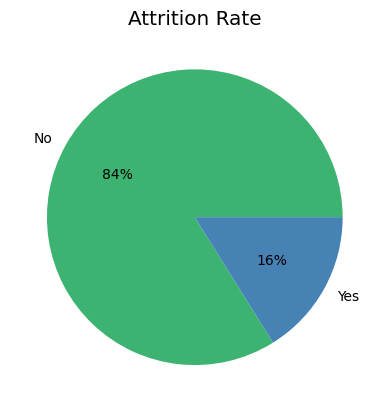

In [28]:
# Checking Target's proportion first to understand the data better
df['Attrition'].value_counts().plot(kind='pie',autopct='%1.0f%%',title='Attrition Rate',colors=['mediumseagreen','steelblue'])
plt.axis('off')
plt.show()

In [29]:
df.select_dtypes('object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Attrition'],
      dtype='object')

In [30]:
df.select_dtypes('int').columns

Index(['EmployeeID', 'Age', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'DistanceFromHome', 'Education', 'EnvSatisfaction', 'PerformanceRating',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

Because there are many columns. Its easier to iterate each column in a single code to speed up EDA. For object type columns, countplots will be used. For int type columns, histogram plots will be used

In [32]:
# Checking counts for object type columns
for obj in df.select_dtypes('object').columns:
    print(df[obj].value_counts(),'\n')

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64 

Gender
Male      882
Female    588
Name: count, dtype: int64 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64 

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64 

OverTime
No     1054
Yes     416
Name: count, dtype: int64 

Attrition
No    

In [33]:
# Checking proportion for object type columns
for obj in df.select_dtypes('object').columns:
    print(round(df[obj].value_counts(normalize=True)*100),'\n')

BusinessTravel
Travel_Rarely        71.0
Travel_Frequently    19.0
Non-Travel           10.0
Name: proportion, dtype: float64 

Department
Research & Development    65.0
Sales                     30.0
Human Resources            4.0
Name: proportion, dtype: float64 

EducationField
Life Sciences       41.0
Medical             32.0
Marketing           11.0
Technical Degree     9.0
Other                6.0
Human Resources      2.0
Name: proportion, dtype: float64 

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64 

JobRole
Sales Executive              22.0
Research Scientist           20.0
Laboratory Technician        18.0
Manufacturing Director       10.0
Healthcare Representative     9.0
Manager                       7.0
Sales Representative          6.0
Research Director             5.0
Human Resources               4.0
Name: proportion, dtype: float64 

MaritalStatus
Married     46.0
Single      32.0
Divorced    22.0
Name: proportion, dtype: float64 

OverTime
No 

C:\Users\User\AppData\Local\Temp\ipykernel_10948\3088315336.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_10948\3088315336.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_10948\3088315336.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_10948\3088315336.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xtic

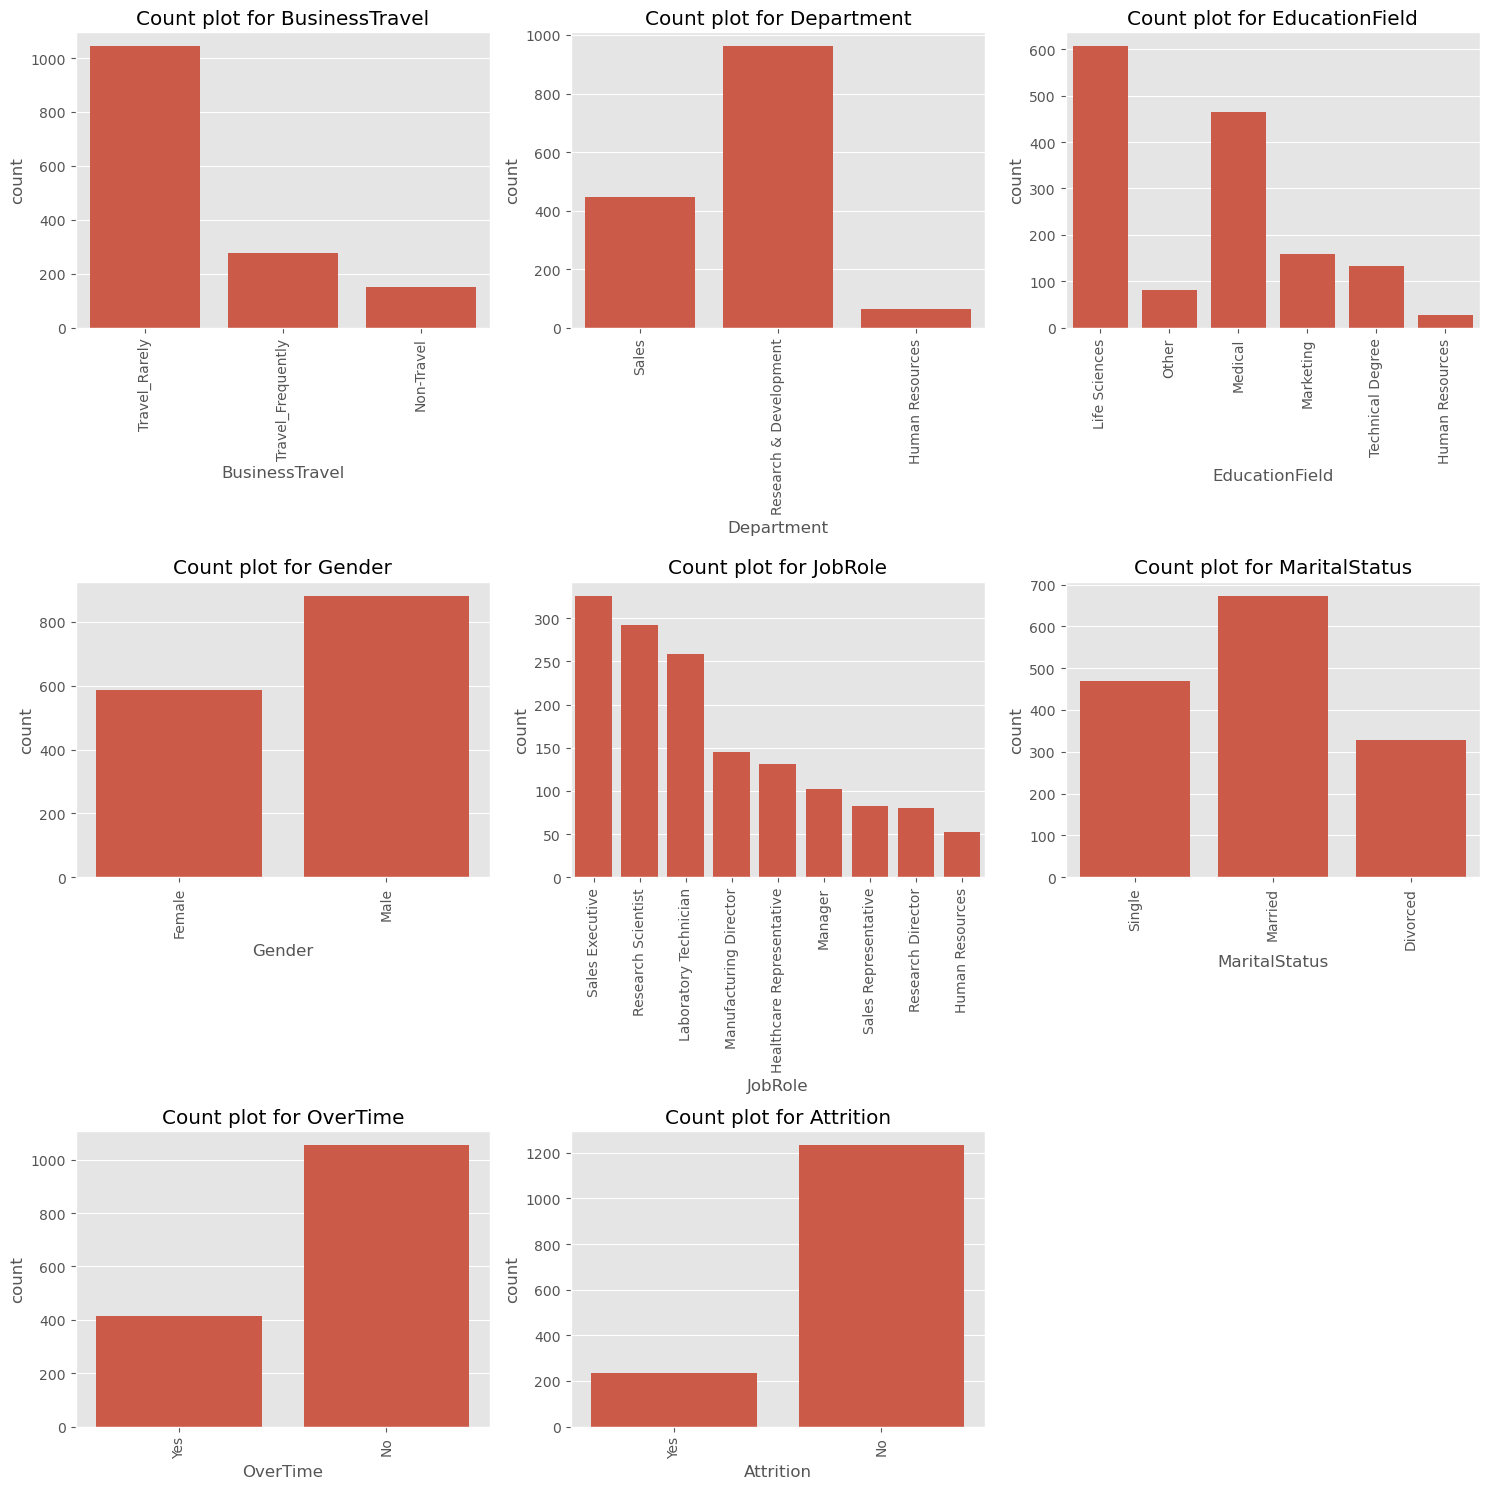

In [34]:
# Checking count plot of each object type column
fig, ax = plt.subplots(3,3, figsize=(15,15))       # define subplots dimension 3rowsx3cols and figize
ax = ax.flatten()                                  # to transform 2D array in 1D to plot multiple
cols = df.select_dtypes('object').columns

for i, col in enumerate(cols):
    sns.countplot(data=df,x=col,ax=ax[i])
    ax[i].set(xlabel=col, title=f'Count plot for {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    
for j in range(i + 1, len(ax)):                    # to delete any empty plots
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

In [35]:
df.select_dtypes('int').columns

Index(['EmployeeID', 'Age', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'DistanceFromHome', 'Education', 'EnvSatisfaction', 'PerformanceRating',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

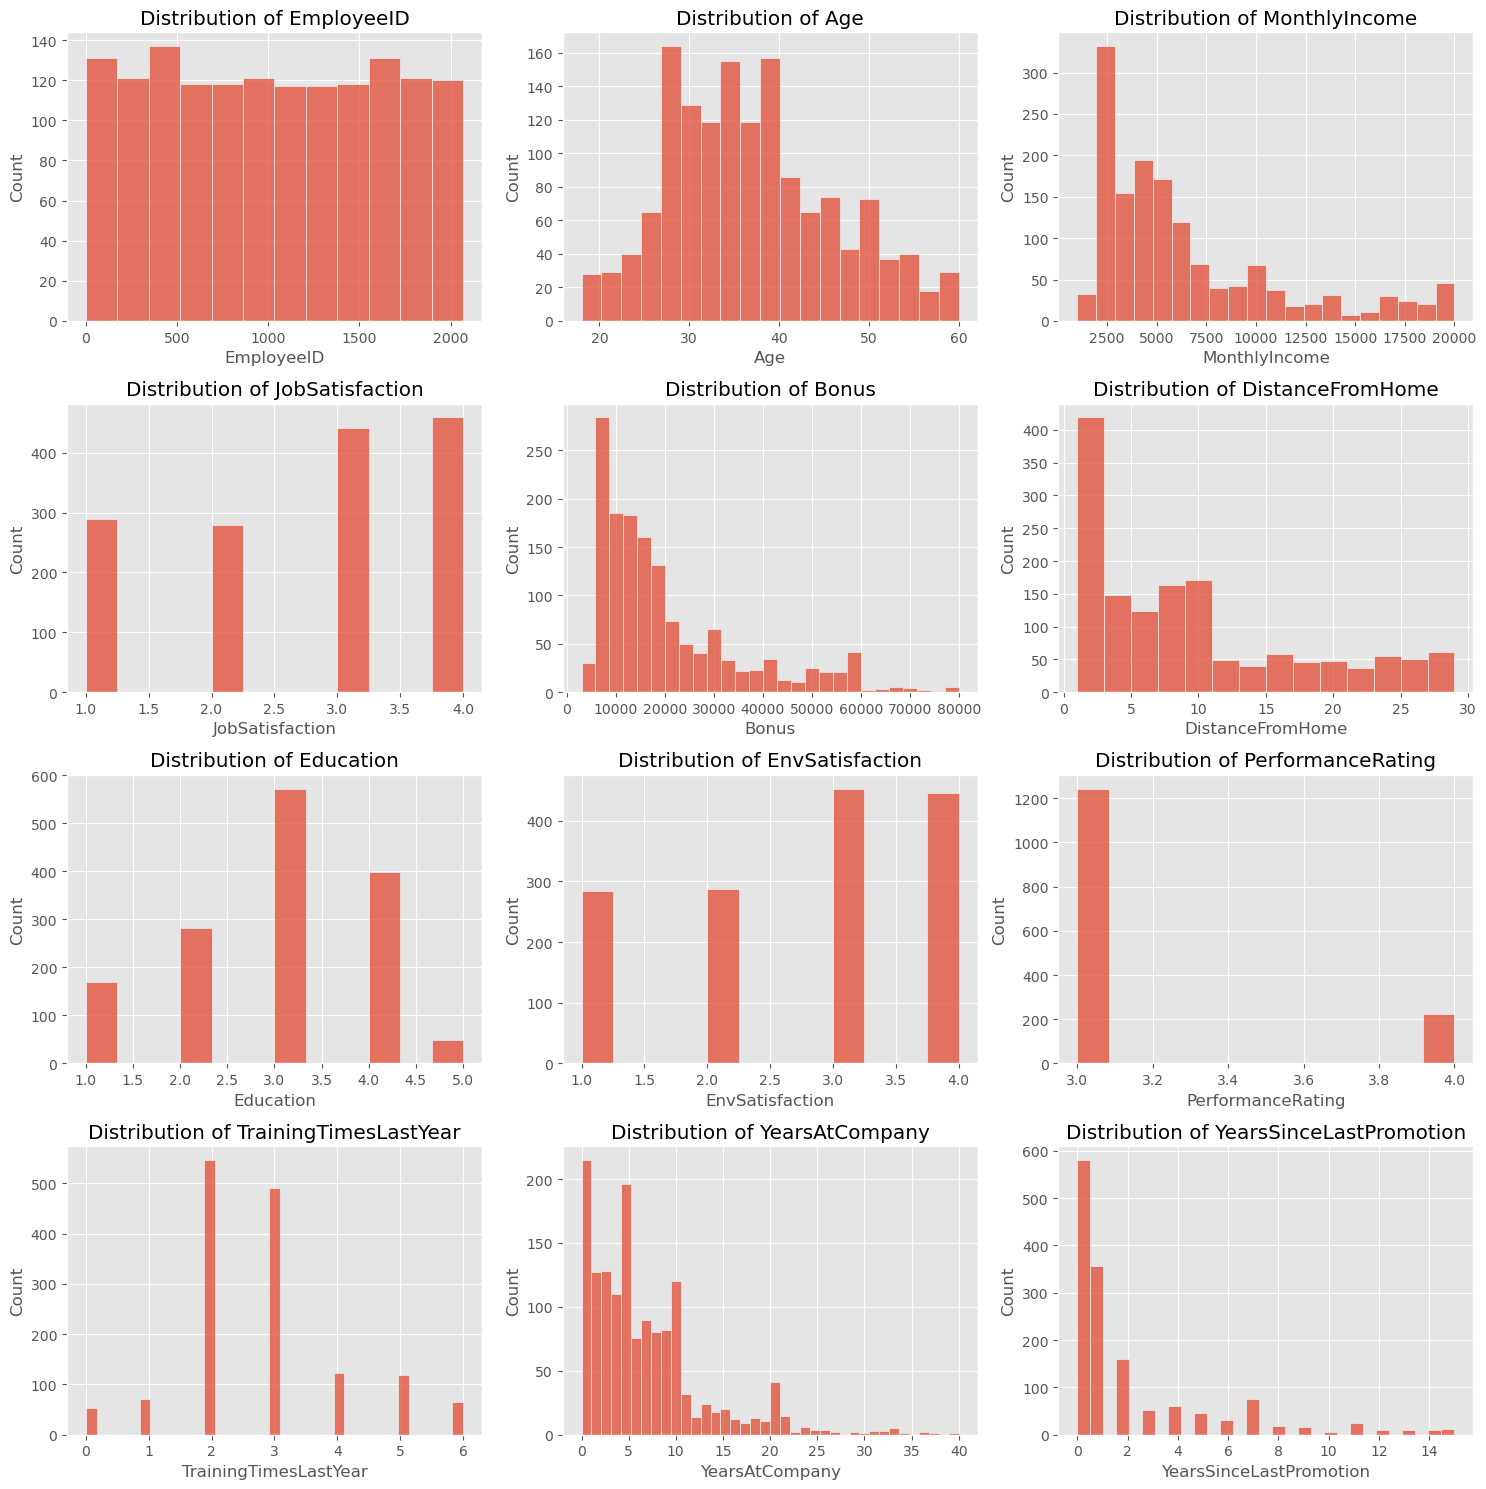

In [36]:
# Checking distribution plot of each object type column
fig, ax = plt.subplots(4,3, figsize=(15,15))
ax = ax.flatten()
cols = df.select_dtypes('int').columns

for i, col in enumerate(cols):
    sns.histplot(data=df,x=col,ax=ax[i])
    ax[i].set(xlabel=col,title=f'Distribution of {col}')

for j in range(i + 1, len(ax)):                    # to delete any empty plots
    fig.delaxes(ax[j])
    
    
plt.tight_layout()
plt.show()

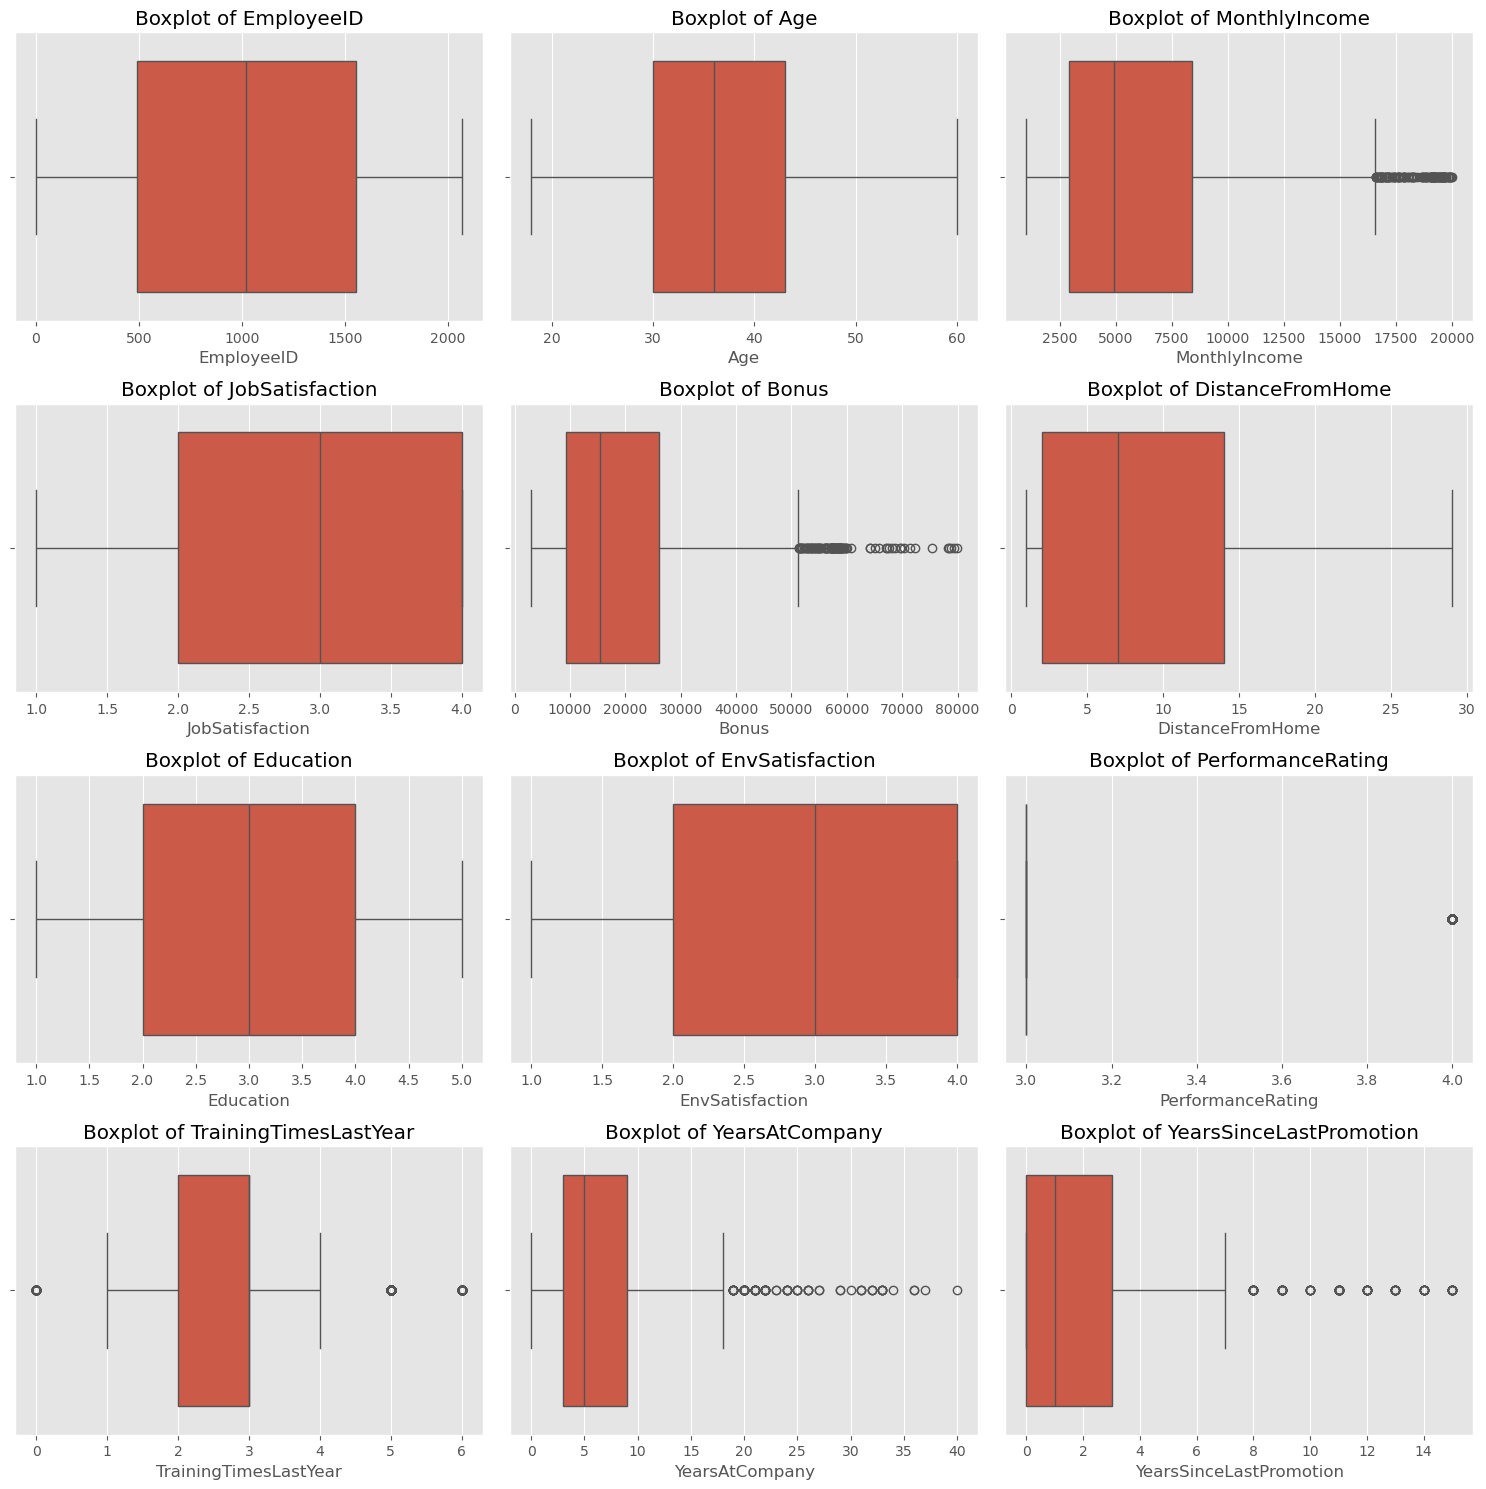

In [37]:
# Checking distribution plot of each object type column
fig, ax = plt.subplots(4,3, figsize=(15,15))
ax = ax.flatten()
cols = df.select_dtypes('int').columns

for i, col in enumerate(cols):
    sns.boxplot(data=df,x=col,ax=ax[i])
    ax[i].set(xlabel=col,title=f'Boxplot of {col}')

for j in range(i + 1, len(ax)):                    # to delete any empty plots
    fig.delaxes(ax[j])
    
    
plt.tight_layout()
plt.show()

In [38]:
# To summarize aggregation of int type columns
df.select_dtypes('int').agg(['min','max','mean','median','std'])

EmployeeID        Age  MonthlyIncome  JobSatisfaction         Bonus  \
min        1.000000  18.000000    1009.000000         1.000000   3027.000000   
max     2068.000000  60.000000   19999.000000         4.000000  79892.000000   
mean    1024.865306  36.923810    6502.931293         2.728571  20479.501361   
median  1020.500000  36.000000    4919.000000         3.000000  15484.500000   
std      602.024335   9.135373    4707.956783         1.102846  15066.272964   

        DistanceFromHome  Education  EnvSatisfaction  PerformanceRating  \
min             1.000000   1.000000         1.000000           3.000000   
max            29.000000   5.000000         4.000000           4.000000   
mean            9.192517   2.912925         2.721769           3.153741   
median          7.000000   3.000000         3.000000           3.000000   
std             8.106864   1.024165         1.093082           0.360824   

        TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  
min                  0.000000        0.000000                 0.000000  
max                  6.000000       40.000000                15.000000  
mean                 2.799320        7.008163                 2.187755  
median               3.000000        5.000000                 1.000000  
std                  1.289271        6.126525                 3.222430

In [39]:
# PerformanceRating seems to have only 2 values. Better to summarize in proportion
df['PerformanceRating'].value_counts(normalize=True)

PerformanceRating
3    0.846259
4    0.153741
Name: proportion, dtype: float64

From univariate analysis, we understand from the dataset :
- 📌 Attrition rate is 16.12%
- 📌 Employee mostly from Research&Development department (65%)
- 📌 Most employee Travel_Rarely (71%)
- 📌 Employee education background mostly Life Science (41%) and Medical (32%) 
- 📌 More male employee (60%) compared to female (40%)
- 📌 Most emplyoee are married (46%)
- 📌 28% of employeed work Overtime 
- 📌 Highest employee headcount is in Sales Executive role (22%)
- 📌 Employee Age between 18-60 years old (mean:37 yo, median:36 yo). Distribution skewed right
- 📌 TrainingTimesLastYear 0-6 times (mean:3, median:3). Normal distribution
- 📌 MonthlyIncome between 1009-19999 dollars (mean:6503, median:4919). Distribution skewed right
- 📌 Bonus between 3027-79892 dollars (mean:20480, median:15484). Distribution skewed right
- 📌 YearsAtCompany between 0-40 years (mean:7, median:5). Distribution skewed right
- 📌 YearsSinceLastPromotion between 0-15 years (mean:2.2, median:1). Distribution skewed right
- 📌 Eduction level between 1-5 (mean:3, median:3). Normal distribution
- 📌 EnvSatisfaction level between 1-4 (mean:3, median:3). Normal distribution
- 📌 JobSatisfaction level between 1-4 (mean:3, median:3). Normal distribution
- 📌 Performance rating between 3-4. 15% of the employees performing well
- 📌 Many outliers in MonthlyIncome, YearsAtCompany, Bonus, and YearsSinceLastPromotion

## Multivariate Analysis 

In [42]:
df.head()

EmployeeID  Age     BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
0           1   41      Travel_Rarely           5993                4  17979   
1           2   49  Travel_Frequently           5130                2  20520   
2           4   37      Travel_Rarely           2090                3   6270   
3           5   33  Travel_Frequently           2909                3   8727   
4           7   27      Travel_Rarely           3468                2  10404   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvSatisfaction  Gender                JobRole MaritalStatus  \
0                2  Female        Sales Executive        Single   
1                3    Male     Research Scientist       Married   
2                4    Male  Laboratory Technician        Single   
3                4  Female     Research Scientist       Married   
4                1    Male  Laboratory Technician       Married   

   PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
0                  3                      0               6   
1                  4                      3              10   
2                  3                      3               0   
3                  3                      3               8   
4                  3                      3               2   

   YearsSinceLastPromotion OverTime Attrition  
0                        0      Yes       Yes  
1                        1       No        No  
2                        0      Yes       Yes  
3                        3      Yes        No  
4                        2       No        No

#### Integer vs Integer

In [44]:
df.select_dtypes('int').columns

Index(['EmployeeID', 'Age', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'DistanceFromHome', 'Education', 'EnvSatisfaction', 'PerformanceRating',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

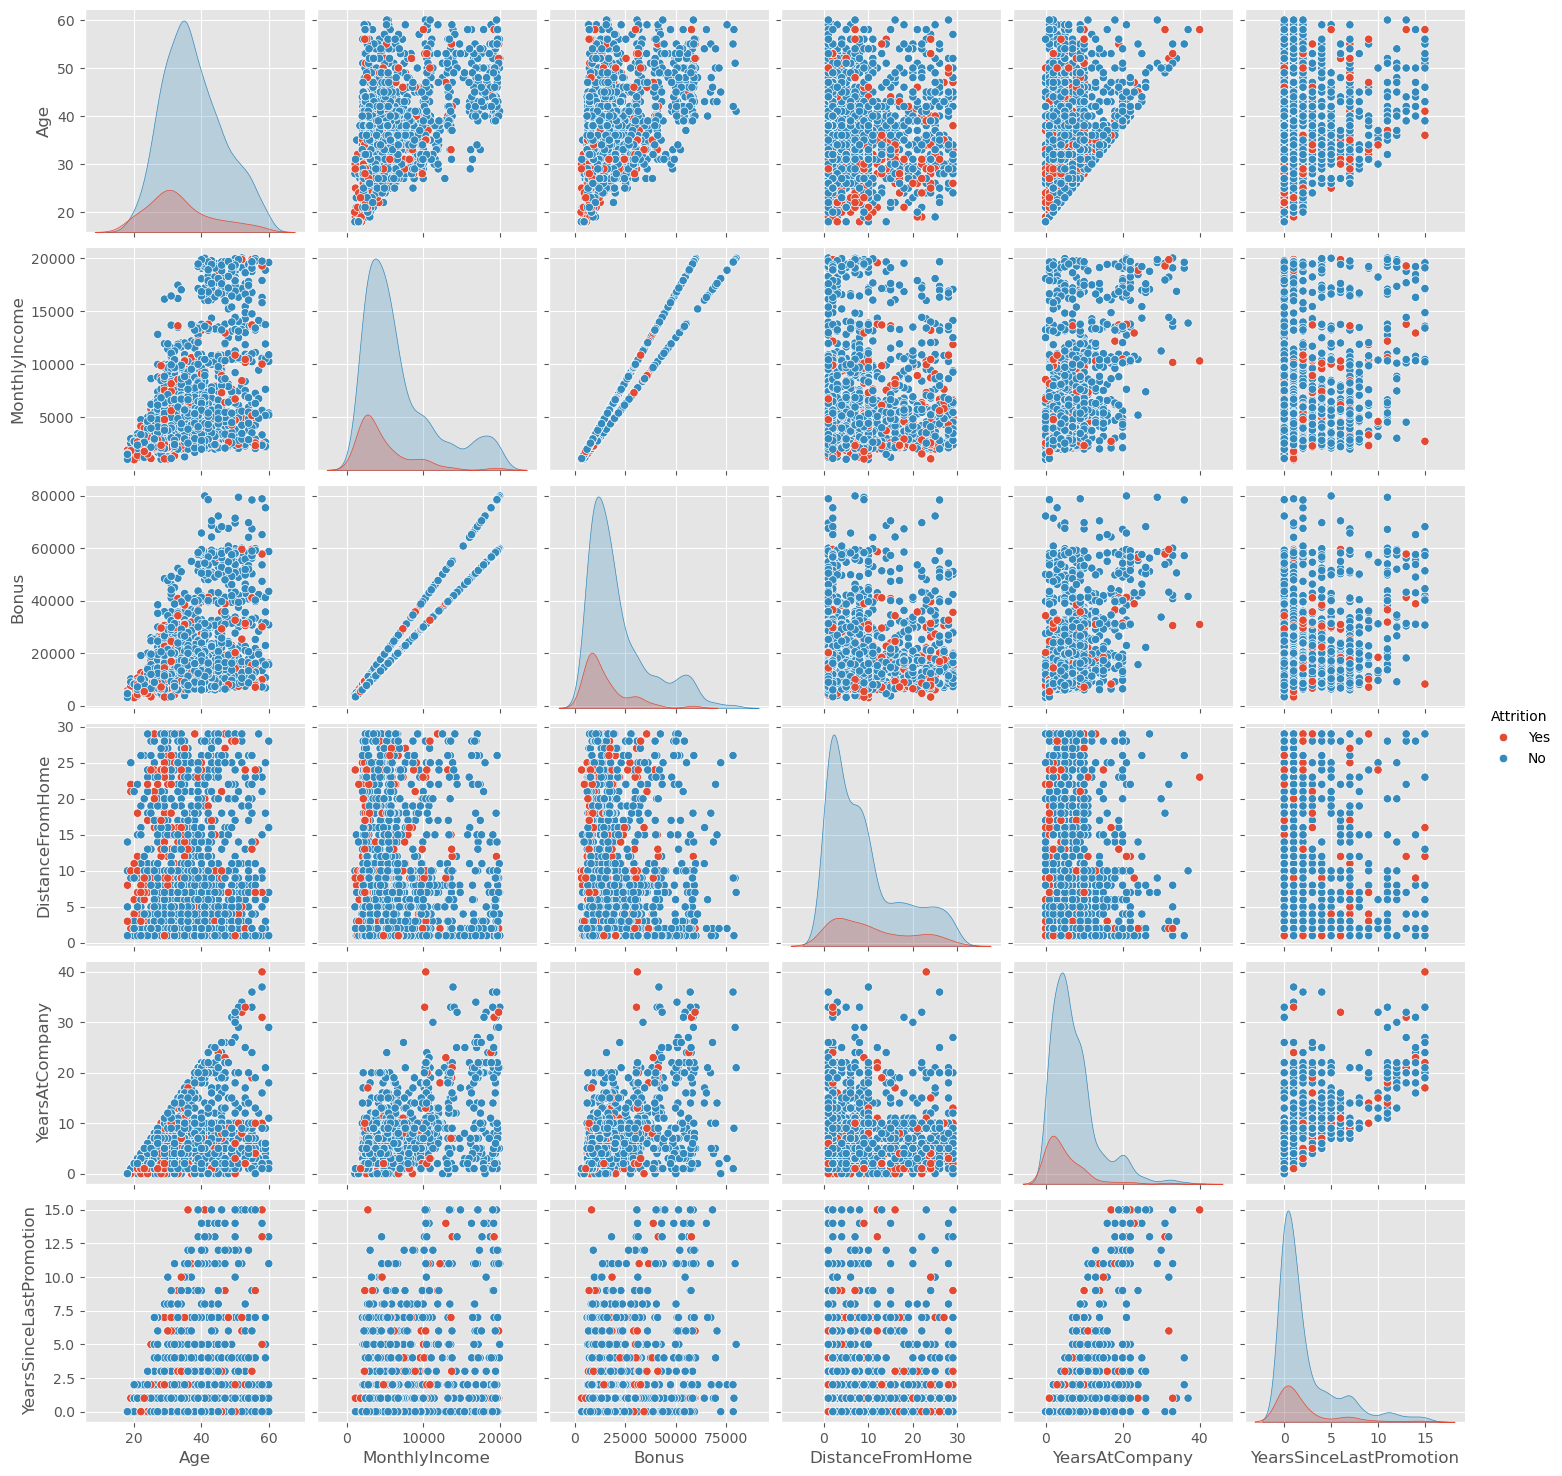

In [45]:
# sns.pairplot is used to get a birdseye view of int columns and how they related to each other
# just to get more insight
cols = [
    #'EmployeeID', 
    'Age', 'MonthlyIncome', 
    #'JobSatisfaction',        # some columns filtered to make it less congested
    'Bonus',
    'DistanceFromHome', 
    #'Education', 
    #'EnvSatisfaction', 
    #'PerformanceRating',
    #'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsSinceLastPromotion','Attrition']
sns.pairplot(df[cols],hue='Attrition')
plt.show()

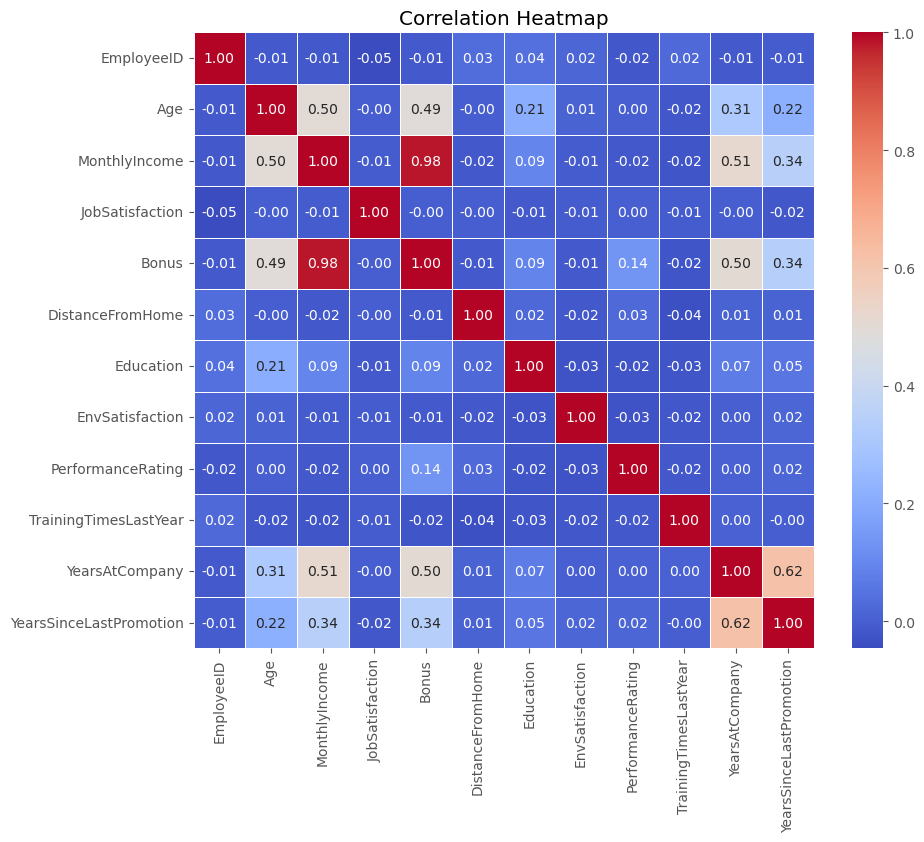

In [46]:
# To quickly see any correlation between all numerical values
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<span style='color:blue'> Very high correlation between independant variables for Bonus vs MonthlyIncome R=0.98

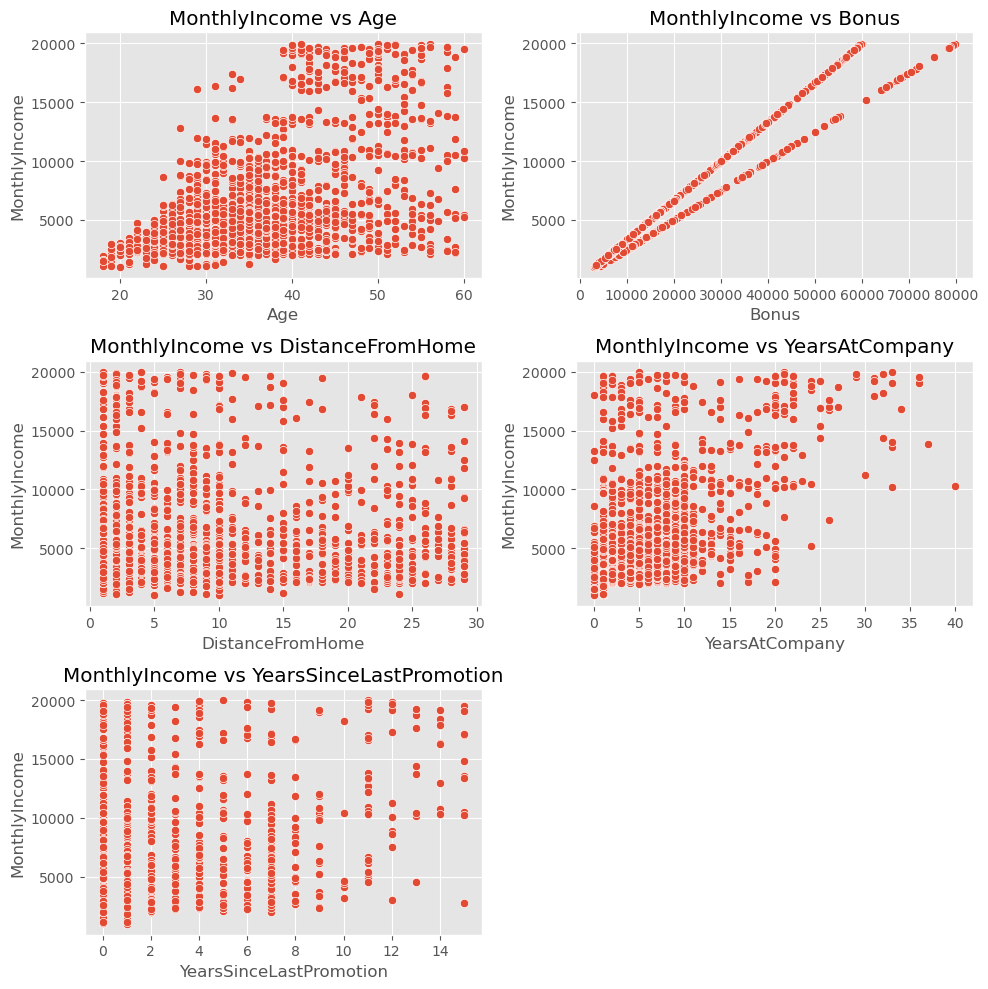

In [48]:
# To quickly see an scatterplot of numerical variables in cols vs monthlyincome
cols = ['Age', 'Bonus',
       'DistanceFromHome',
       'YearsAtCompany', 'YearsSinceLastPromotion']
fig,ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(data=df,x=col,y='MonthlyIncome', ax=ax[i])
    ax[i].set(ylabel='MonthlyIncome',xlabel=col,title=f'MonthlyIncome vs {col}')

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

In [49]:
# To understand better context, and to see how Bonus, MonthlyIncome and PerformanceRating is correlated to each other
((df['Bonus']/df['MonthlyIncome'])==df['PerformanceRating']).sum()

1470

<span style='color:blue'> $Bonus = PerformanceRating * MonthlyIncome$

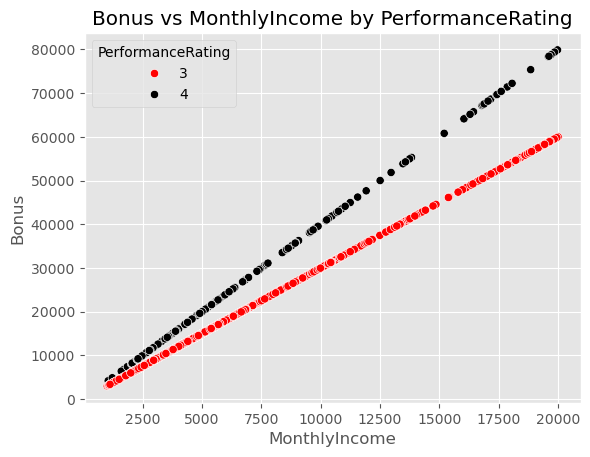

In [51]:
# Setting hue=PerformanceRating give better understanding why there are 2 different trends
ax = sns.scatterplot(data=df,y='Bonus',x='MonthlyIncome',hue='PerformanceRating', palette=['red','black'])
ax.set(title='Bonus vs MonthlyIncome by PerformanceRating')
plt.show()

In [52]:
# Subsetting df of those who perform and dont perform in the company 
df_perform = df[df['PerformanceRating']==4].reset_index(drop=True).copy()
df_xperform = df[df['PerformanceRating']==3].reset_index(drop=True).copy()

In [53]:
df[['MonthlyIncome','Bonus']].corr()

MonthlyIncome    Bonus
MonthlyIncome        1.00000  0.98203
Bonus                0.98203  1.00000

In [54]:
# To confirm its a straight line
df_perform[['MonthlyIncome','Bonus']].corr()

MonthlyIncome  Bonus
MonthlyIncome            1.0    1.0
Bonus                    1.0    1.0

In [55]:
df_xperform[['MonthlyIncome','Bonus']].corr()

MonthlyIncome  Bonus
MonthlyIncome            1.0    1.0
Bonus                    1.0    1.0

<span style='color:blue'> Performance Rating directly correlated to bonus and monthly income of employees!

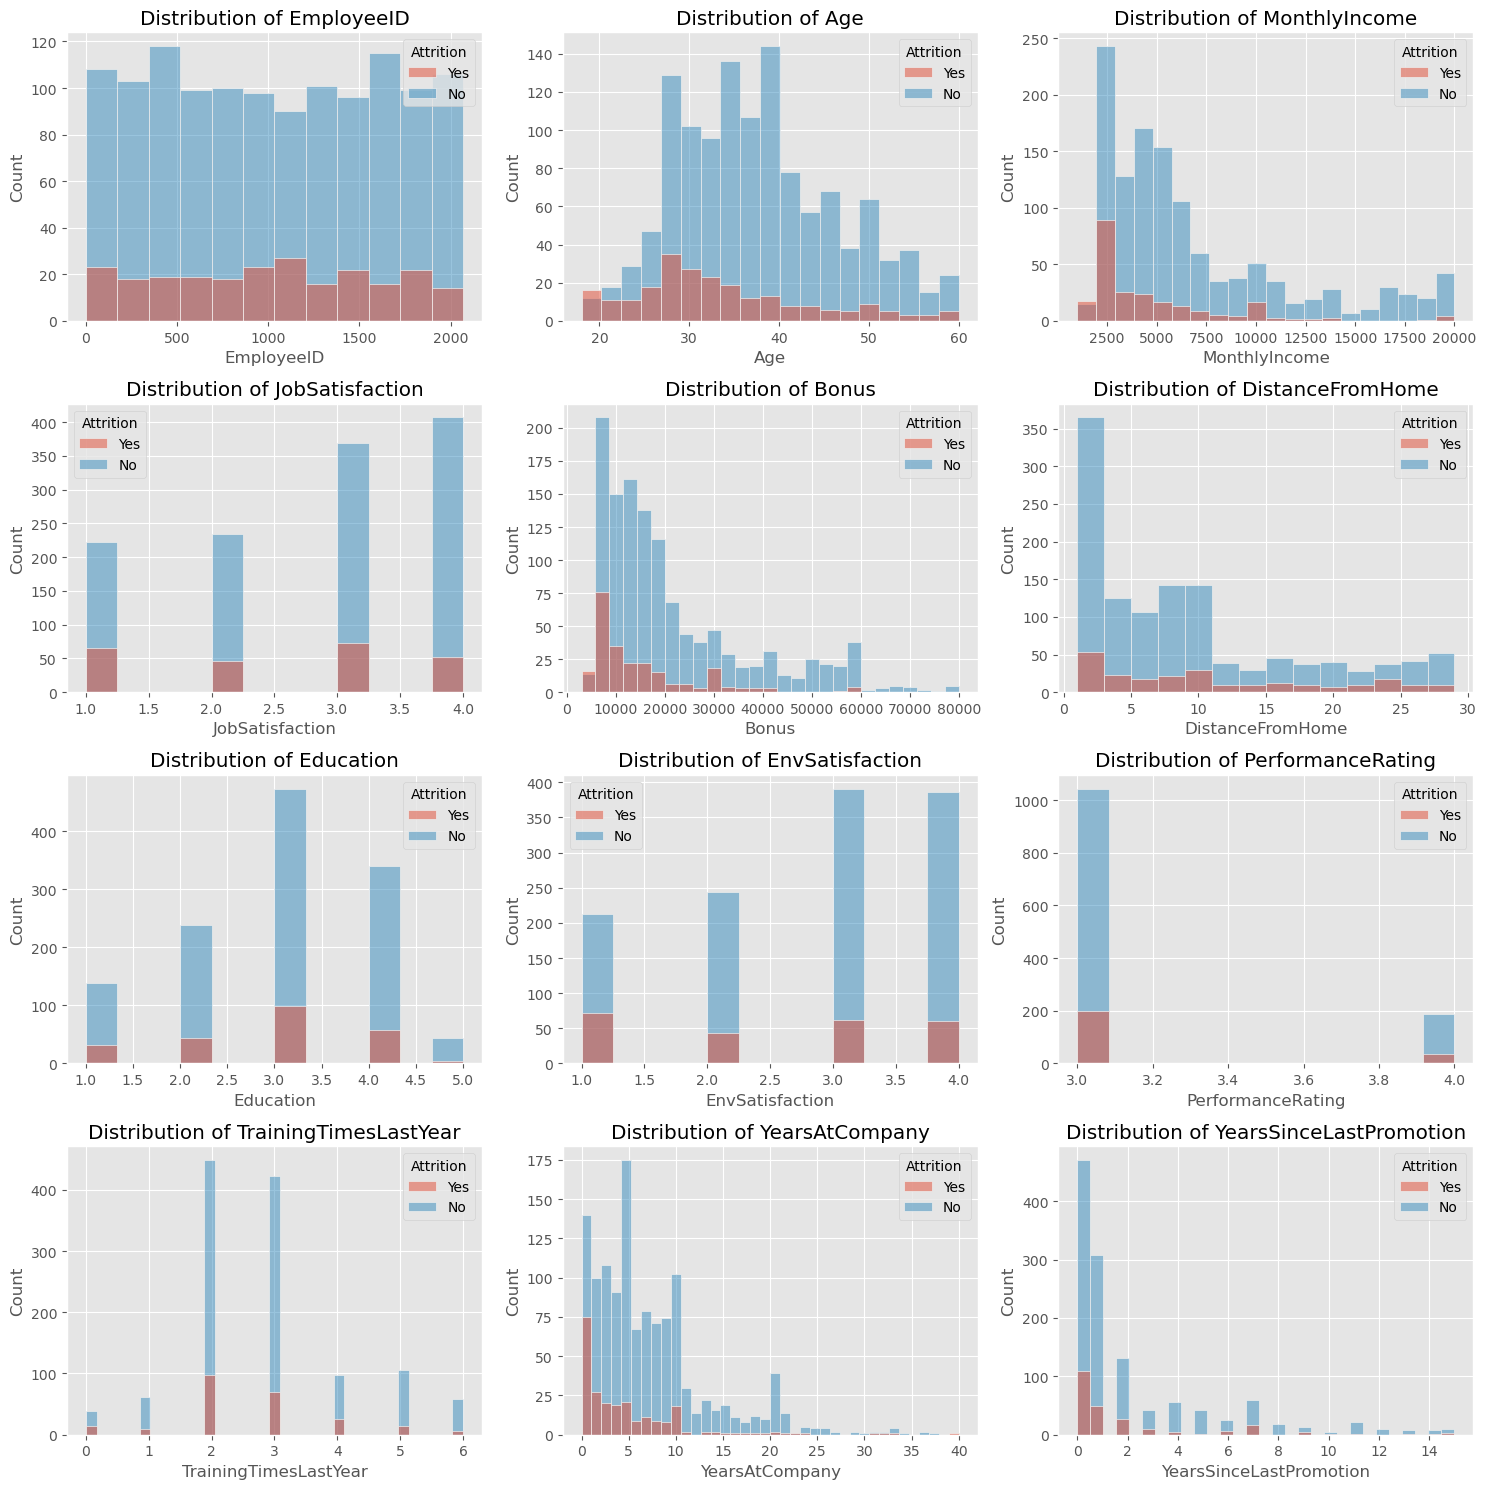

In [57]:
# Checking distribution plot of each object type column with hue='Attrition' 
# To understand distribution difference between Attrition Yes and No
fig, ax = plt.subplots(4,3, figsize=(15,15))
ax = ax.flatten()
cols = df.select_dtypes('int').columns

for i, col in enumerate(cols):
    sns.histplot(data=df,x=col,ax=ax[i],hue='Attrition')
    ax[i].set(xlabel=col,title=f'Distribution of {col}')

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

#### Integer vs Categorical

In [59]:
cols = ['BusinessTravel','JobRole','Attrition']      # to ensure consistent labelling order,sort by fixed ascending 
ordercat(df,cols)

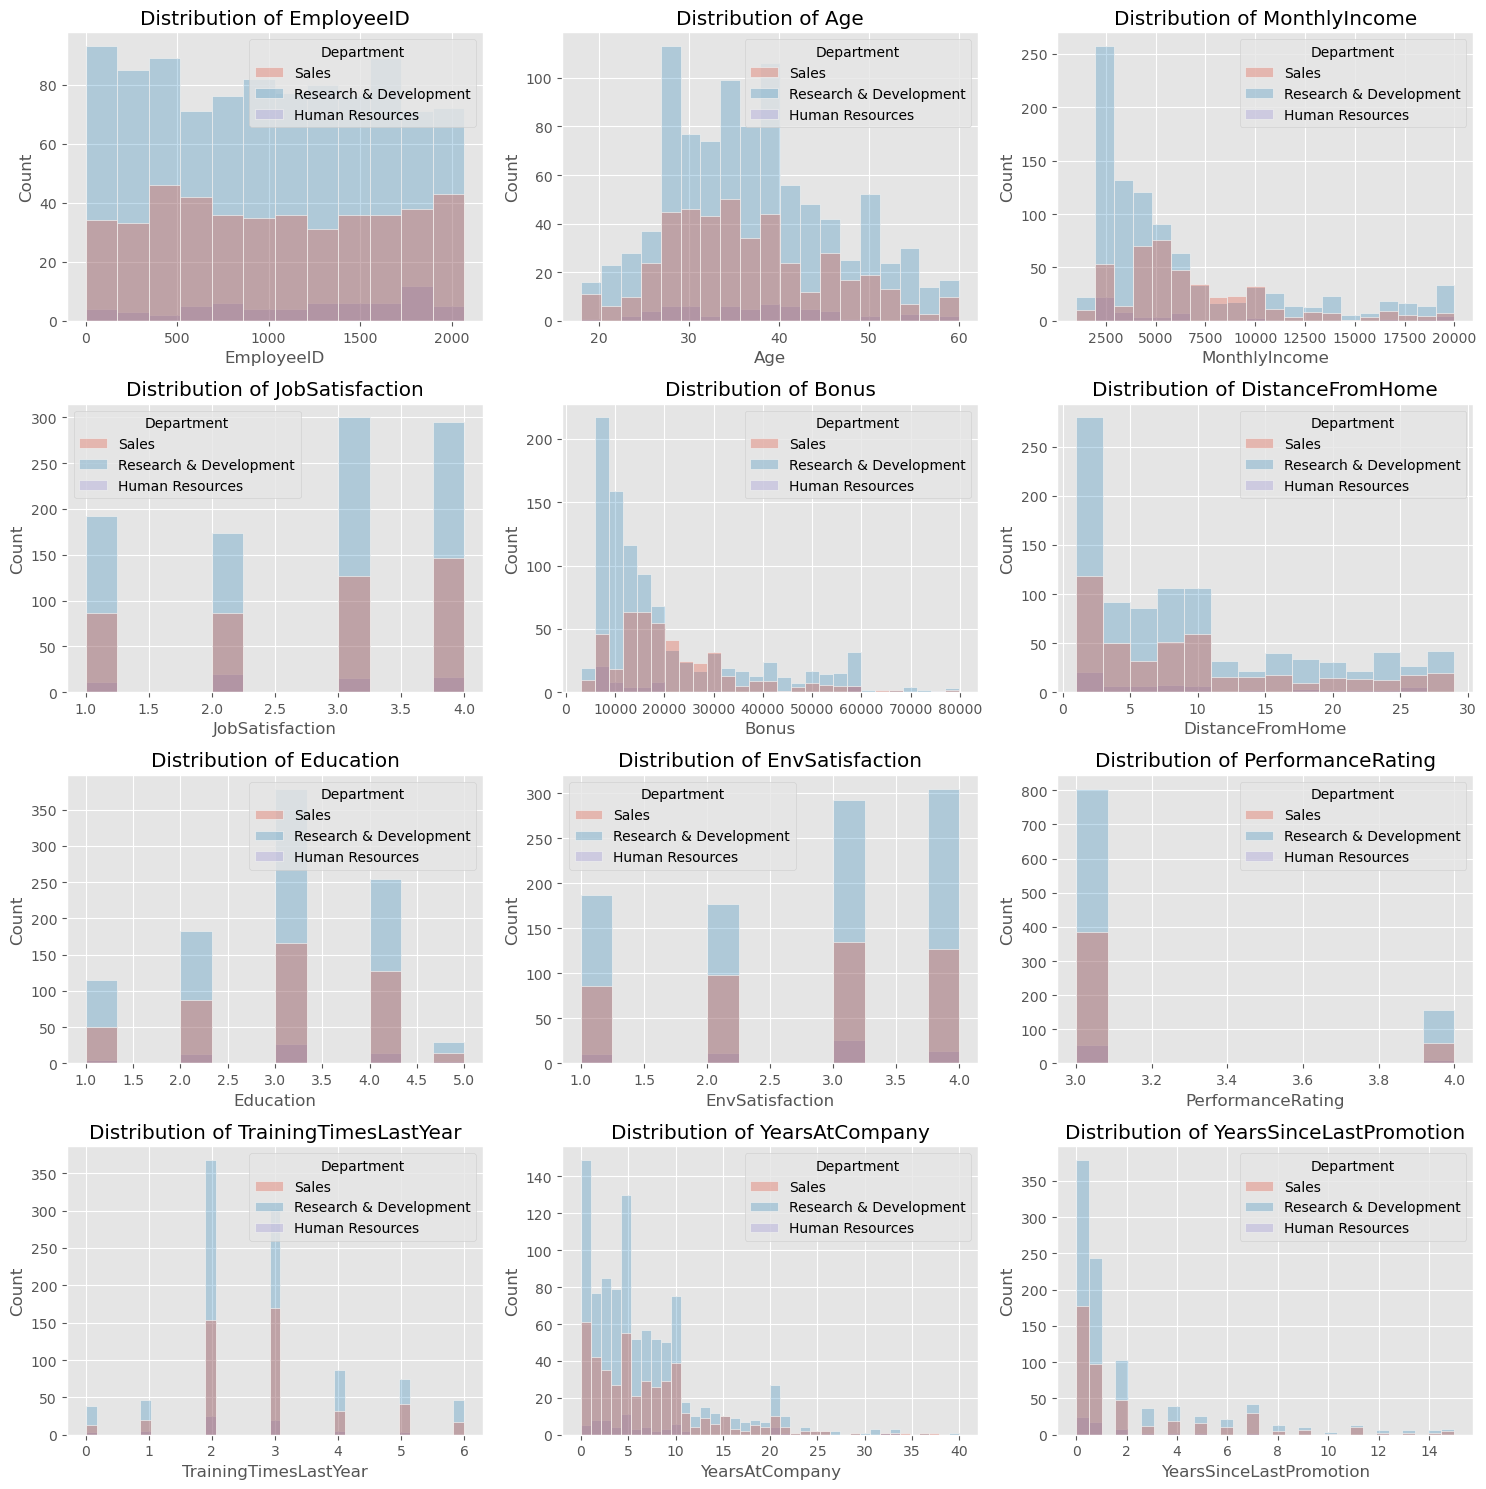

In [60]:
# Checking distribution plot of each object type column with hue='Attrition' 
# To understand distribution difference between Attrition Yes and No
fig, ax = plt.subplots(4,3, figsize=(15,15))
ax = ax.flatten()
cols = df.select_dtypes('int').columns

for i, col in enumerate(cols):
    sns.histplot(data=df,x=col,ax=ax[i],hue='Department',alpha=0.3)
    ax[i].set(xlabel=col,title=f'Distribution of {col}')

    
plt.tight_layout()
plt.show()

In [61]:
df.select_dtypes('object').columns

Index(['Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime'], dtype='object')

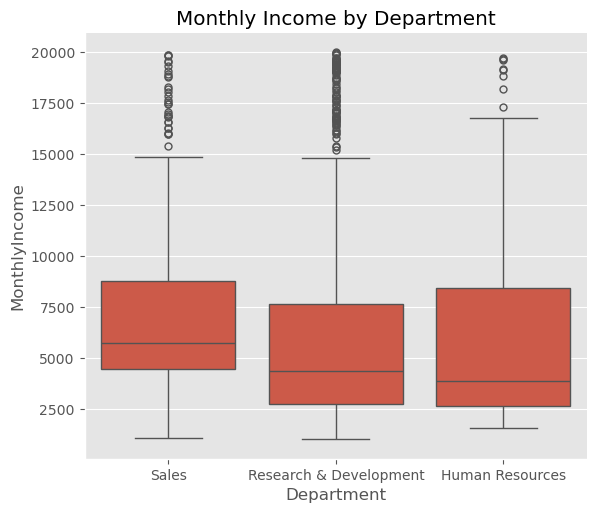

In [62]:
ax = sns.catplot(kind='box',data=df,x='Department',y='MonthlyIncome',aspect=1.2)
ax.set(title='Monthly Income by Department')
plt.show()

In [63]:
stats.levene(df['MonthlyIncome'][df['Department']=='Sales'],
             df['MonthlyIncome'][df['Department']=='Research & Development'],
             df['MonthlyIncome'][df['Department']=='Human Resources'],
             center='mean')

LeveneResult(statistic=12.36104531627217, pvalue=4.746771564172143e-06)

In [64]:
stats.f_oneway(df['MonthlyIncome'][df['Department']=='Sales'],
             df['MonthlyIncome'][df['Department']=='Research & Development'],
             df['MonthlyIncome'][df['Department']=='Human Resources'])

F_onewayResult(statistic=3.201782929420171, pvalue=0.04097409724987449)

<span style='color:blue'> Employee in Sales seems to have higher monthly income

In [66]:
df.groupby('Attrition')['MonthlyIncome'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_10948\3224923957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Attrition')['MonthlyIncome'].describe()


count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0

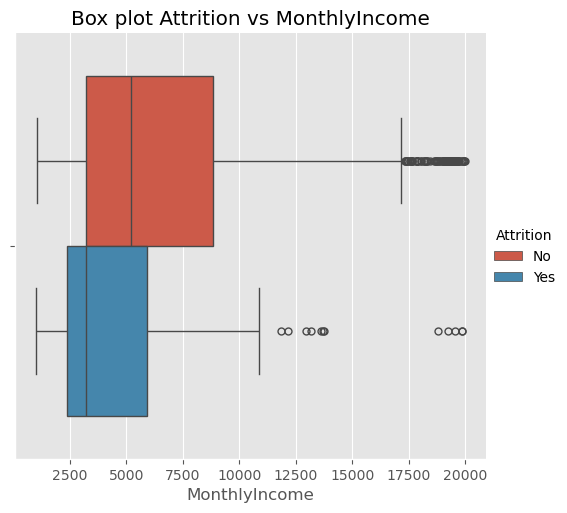

In [67]:
ax = sns.catplot(data=df,kind='box',x='MonthlyIncome',hue='Attrition')
ax.set(title='Box plot Attrition vs MonthlyIncome')
plt.show()

In [68]:
stats.levene(df['MonthlyIncome'][df['Attrition']=='Yes'],
             df['MonthlyIncome'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)

In [69]:
stats.ttest_ind(df['MonthlyIncome'][df['Attrition']=='Yes'],
                df['MonthlyIncome'][df['Attrition']=='No'],
               equal_var=False)

TtestResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13, df=412.74074755747006)

<span style='color:blue'> Monthly income affects the Attrition. pvalue = 4.43E-13 (<0.05)

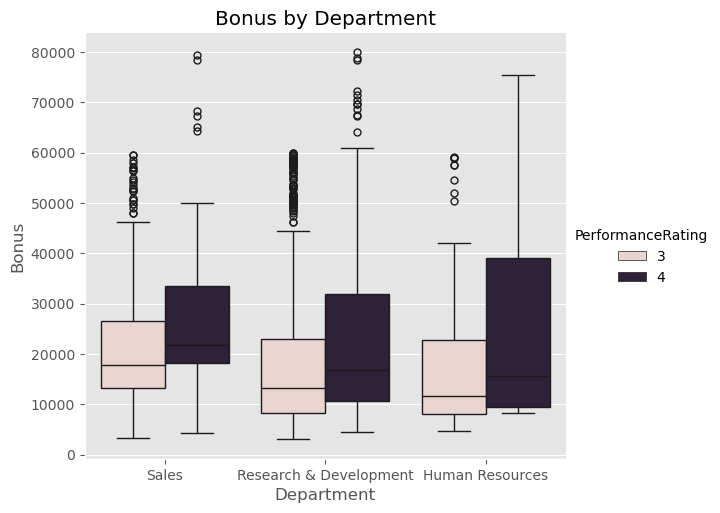

In [71]:
ax = sns.catplot(kind='box',data=df,x='Department',y='Bonus',aspect=1.2,hue='PerformanceRating')
ax.set(title='Bonus by Department')
plt.show()

In [72]:
stats.levene(df['Bonus'][(df['Department']=='Sales') & (df['PerformanceRating']==3)],
             df['Bonus'][(df['Department']=='Sales') & (df['PerformanceRating']==4)],
             df['Bonus'][(df['Department']=='Research & Development') & (df['PerformanceRating']==3)],
             df['Bonus'][(df['Department']=='Research & Development') & (df['PerformanceRating']==4)],
             df['Bonus'][(df['Department']=='Human Resources') & (df['PerformanceRating']==3)],
             df['Bonus'][(df['Department']=='Human Resources') & (df['PerformanceRating']==4)],
             center='mean')

LeveneResult(statistic=11.039564599084434, pvalue=1.8725499684877542e-10)

In [73]:
stats.f_oneway(df['Bonus'][(df['Department']=='Sales') & (df['PerformanceRating']==3)],
             df['Bonus'][(df['Department']=='Sales') & (df['PerformanceRating']==4)],
             df['Bonus'][(df['Department']=='Research & Development') & (df['PerformanceRating']==3)],
             df['Bonus'][(df['Department']=='Research & Development') & (df['PerformanceRating']==4)],
             df['Bonus'][(df['Department']=='Human Resources') & (df['PerformanceRating']==3)],
             df['Bonus'][(df['Department']=='Human Resources') & (df['PerformanceRating']==4)])

F_onewayResult(statistic=6.839254358122262, pvalue=2.5650297684390214e-06)

<span style='color:blue'> Those who perform in Sales Department have higher bonus

<Axes: xlabel='PerformanceRating', ylabel='Bonus'>

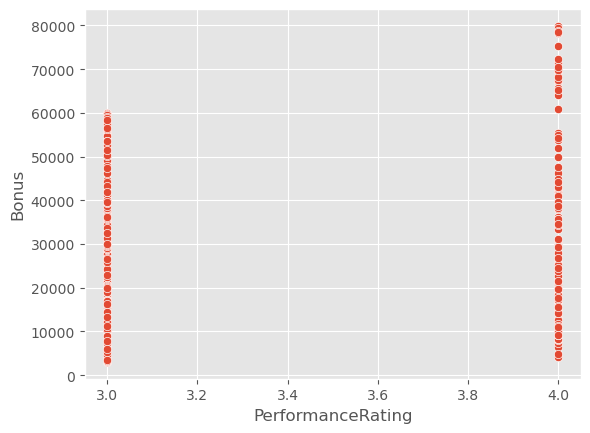

In [75]:
sns.scatterplot(data=df,x='PerformanceRating',y='Bonus')

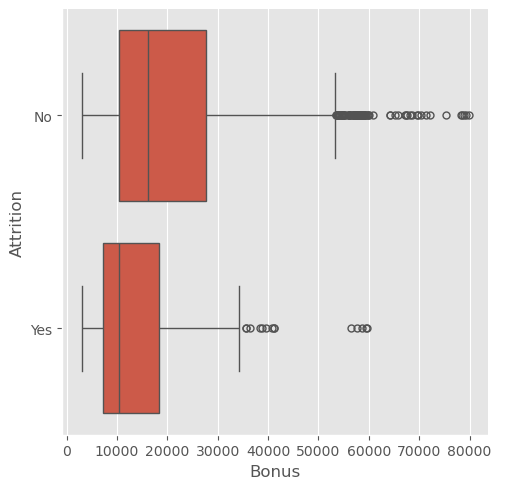

In [76]:
sns.catplot(data=df,kind='box',y='Attrition',x='Bonus')
plt.show()

In [77]:
stats.levene(df['Bonus'][df['Attrition']=='Yes'],
             df['Bonus'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=31.611860459322592, pvalue=2.2502347973082613e-08)

In [78]:
stats.ttest_ind(df['Bonus'][df['Attrition']=='Yes'],
             df['Bonus'][df['Attrition']=='No'],
             equal_var=False)

TtestResult(statistic=-7.831954710068883, pvalue=3.692333845137077e-14, df=436.014735499316)

<span style='color:blue'> Bonus affects the Attrition. pvalue = 3.69E-14 (<0.05)

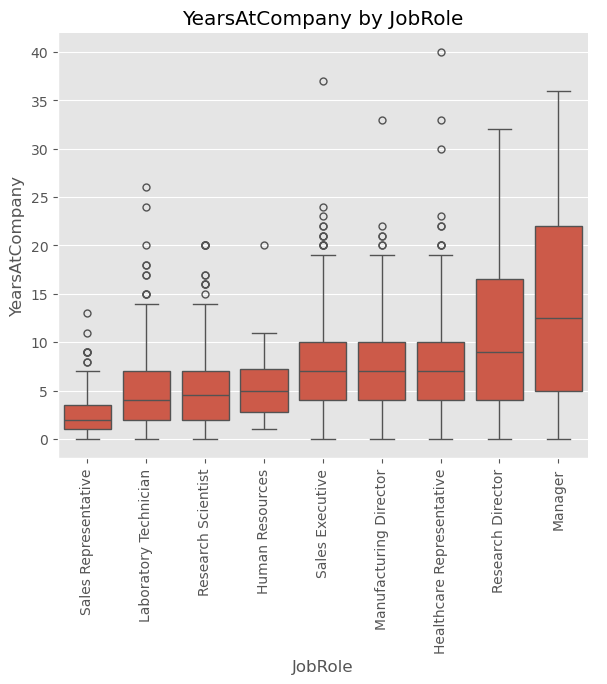

In [80]:
ax = sns.catplot(kind='box',data=df,x='JobRole',y='YearsAtCompany',aspect=1.2)
ax.set(title='YearsAtCompany by JobRole')
ax.set_xticklabels(rotation=90)
plt.show()

<span style='color:blue'> Those who work as Sales Representative seems to have the least YearsAtCompany

In [82]:
df.sort_values(by='EmployeeID')['Attrition'][df['JobRole']=='Sales Representative'].value_counts(normalize=True)

Attrition
No     0.60241
Yes    0.39759
Name: proportion, dtype: float64

In [83]:
df['JobRole'].unique()

['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
Categories (9, object): ['Sales Representative' < 'Laboratory Technician' < 'Research Scientist' < 'Human Resources' ... 'Manufacturing Director' < 'Healthcare Representative' < 'Research Director' < 'Manager']

In [84]:
for job in df['JobRole'].unique():
    print(job,'\n',df.sort_values(by='EmployeeID')['Attrition'][df['JobRole']==job].value_counts(normalize=True),'\n')

Sales Executive 
 Attrition
No     0.825153
Yes    0.174847
Name: proportion, dtype: float64 

Research Scientist 
 Attrition
No     0.839041
Yes    0.160959
Name: proportion, dtype: float64 

Laboratory Technician 
 Attrition
No     0.760618
Yes    0.239382
Name: proportion, dtype: float64 

Manufacturing Director 
 Attrition
No     0.931034
Yes    0.068966
Name: proportion, dtype: float64 

Healthcare Representative 
 Attrition
No     0.931298
Yes    0.068702
Name: proportion, dtype: float64 

Manager 
 Attrition
No     0.95098
Yes    0.04902
Name: proportion, dtype: float64 

Sales Representative 
 Attrition
No     0.60241
Yes    0.39759
Name: proportion, dtype: float64 

Research Director 
 Attrition
No     0.975
Yes    0.025
Name: proportion, dtype: float64 

Human Resources 
 Attrition
No     0.769231
Yes    0.230769
Name: proportion, dtype: float64 



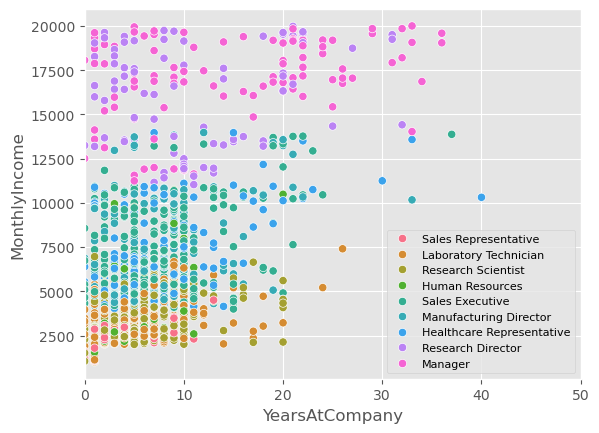

In [85]:
ax = sns.scatterplot(data=df,x='YearsAtCompany',y='MonthlyIncome',hue='JobRole')
ax.set(xlim=(0,50))
plt.legend(loc='lower right', prop={'size': 8})
plt.show()

In [86]:
cols = ['JobRole']
ordercat(df,cols)
ordercat(df_perform,cols)
ordercat(df_xperform,cols)

In [87]:
income_department = df.groupby(['Department','JobRole'])['MonthlyIncome'].mean().reset_index()
income_department = income_department[-(income_department['MonthlyIncome'].isnull())].reset_index(drop=True)
income_department.rename(columns={'MonthlyIncome':'AvgIncome'})

C:\Users\User\AppData\Local\Temp\ipykernel_10948\1527633290.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_department = df.groupby(['Department','JobRole'])['MonthlyIncome'].mean().reset_index()


Department                    JobRole     AvgIncome
0          Human Resources            Human Resources   4235.750000
1          Human Resources                    Manager  18088.636364
2   Research & Development      Laboratory Technician   3237.169884
3   Research & Development         Research Scientist   3239.972603
4   Research & Development     Manufacturing Director   7295.137931
5   Research & Development  Healthcare Representative   7528.763359
6   Research & Development          Research Director  16033.550000
7   Research & Development                    Manager  17130.333333
8                    Sales       Sales Representative   2626.000000
9                    Sales            Sales Executive   6924.279141
10                   Sales                    Manager  16986.972973

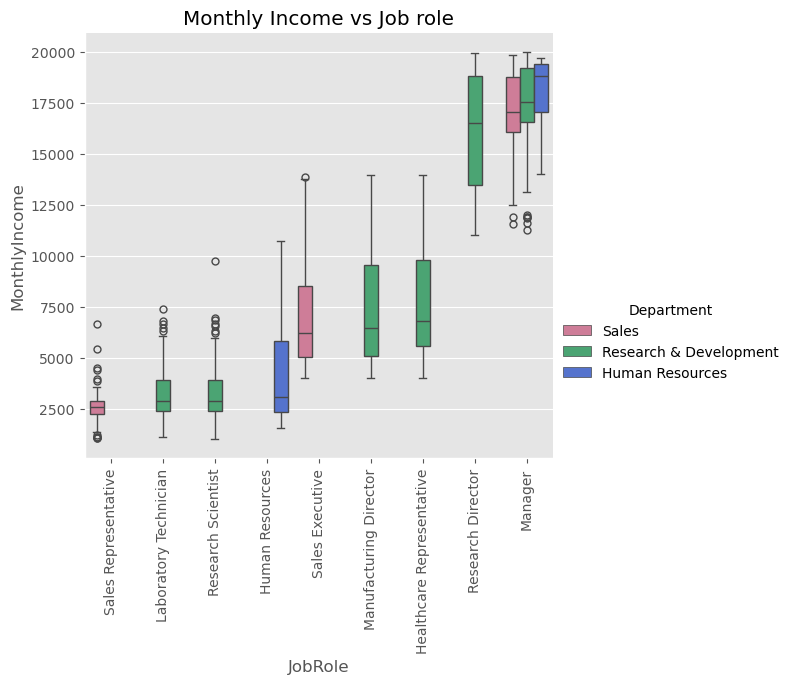

In [88]:
ax = sns.catplot(data=df,kind='box',x='JobRole',
                 y='MonthlyIncome',hue='Department',
                 palette={'Sales':'palevioletred','Research & Development':'mediumseagreen','Human Resources':'royalblue'},
                 aspect=1.2)
ax.set(title='Monthly Income vs Job role')
ax.set_xticklabels(rotation=90)
plt.show()

In [89]:
crossTab = pd.crosstab(index=df['JobRole'],columns=df['Attrition'])
crossTab

Attrition                   No  Yes
JobRole                            
Sales Representative        50   33
Laboratory Technician      197   62
Research Scientist         245   47
Human Resources             40   12
Sales Executive            269   57
Manufacturing Director     135   10
Healthcare Representative  122    9
Research Director           78    2
Manager                     97    5

In [90]:
cross = pd.crosstab(index=df['JobRole'],columns=df['Attrition'],normalize='index').round(4)*100
cross

Attrition                     No    Yes
JobRole                                
Sales Representative       60.24  39.76
Laboratory Technician      76.06  23.94
Research Scientist         83.90  16.10
Human Resources            76.92  23.08
Sales Executive            82.52  17.48
Manufacturing Director     93.10   6.90
Healthcare Representative  93.13   6.87
Research Director          97.50   2.50
Manager                    95.10   4.90

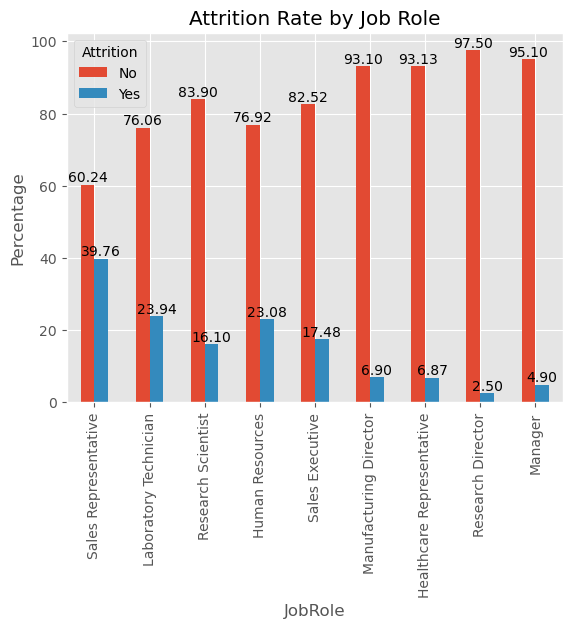

In [91]:
ax = cross.reset_index().plot(kind='bar',x='JobRole',ylabel='Percentage',title='Attrition Rate by Job Role')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.show()

In [92]:
stats.chi2_contingency(crossTab)

Chi2ContingencyResult(statistic=86.19025367670436, pvalue=2.7524816380506373e-15, dof=8, expected_freq=array([[ 69.61836735,  13.38163265],
       [217.24285714,  41.75714286],
       [244.92244898,  47.07755102],
       [ 43.61632653,   8.38367347],
       [273.44081633,  52.55918367],
       [121.62244898,  23.37755102],
       [109.87959184,  21.12040816],
       [ 67.10204082,  12.89795918],
       [ 85.55510204,  16.44489796]]))

<span style='color:blue'> Sales Representative have highest Attrition Rate by Job Role. 40% of Sales Representative resigned

<span style='color:blue'> Jobrole affects Attrition. pvalue = 2.75E-15 (<0.05)

In [95]:
df['BusinessTravel'][(df['JobRole']=='Sales Representative') & (df['Attrition']=='Yes')].value_counts()

BusinessTravel
Travel_Rarely        18
Travel_Frequently    15
Non-Travel            0
Name: count, dtype: int64

In [96]:
for obj in df.select_dtypes('object').columns:
    print(df[obj][(df['JobRole']=='Sales Representative') & (df['Attrition']=='Yes')].value_counts(),'\n')

Department
Sales    33
Name: count, dtype: int64 

EducationField
Marketing           12
Life Sciences        9
Technical Degree     6
Medical              5
Other                1
Name: count, dtype: int64 

Gender
Male      17
Female    16
Name: count, dtype: int64 

MaritalStatus
Single      21
Married      8
Divorced     4
Name: count, dtype: int64 

OverTime
No     17
Yes    16
Name: count, dtype: int64 



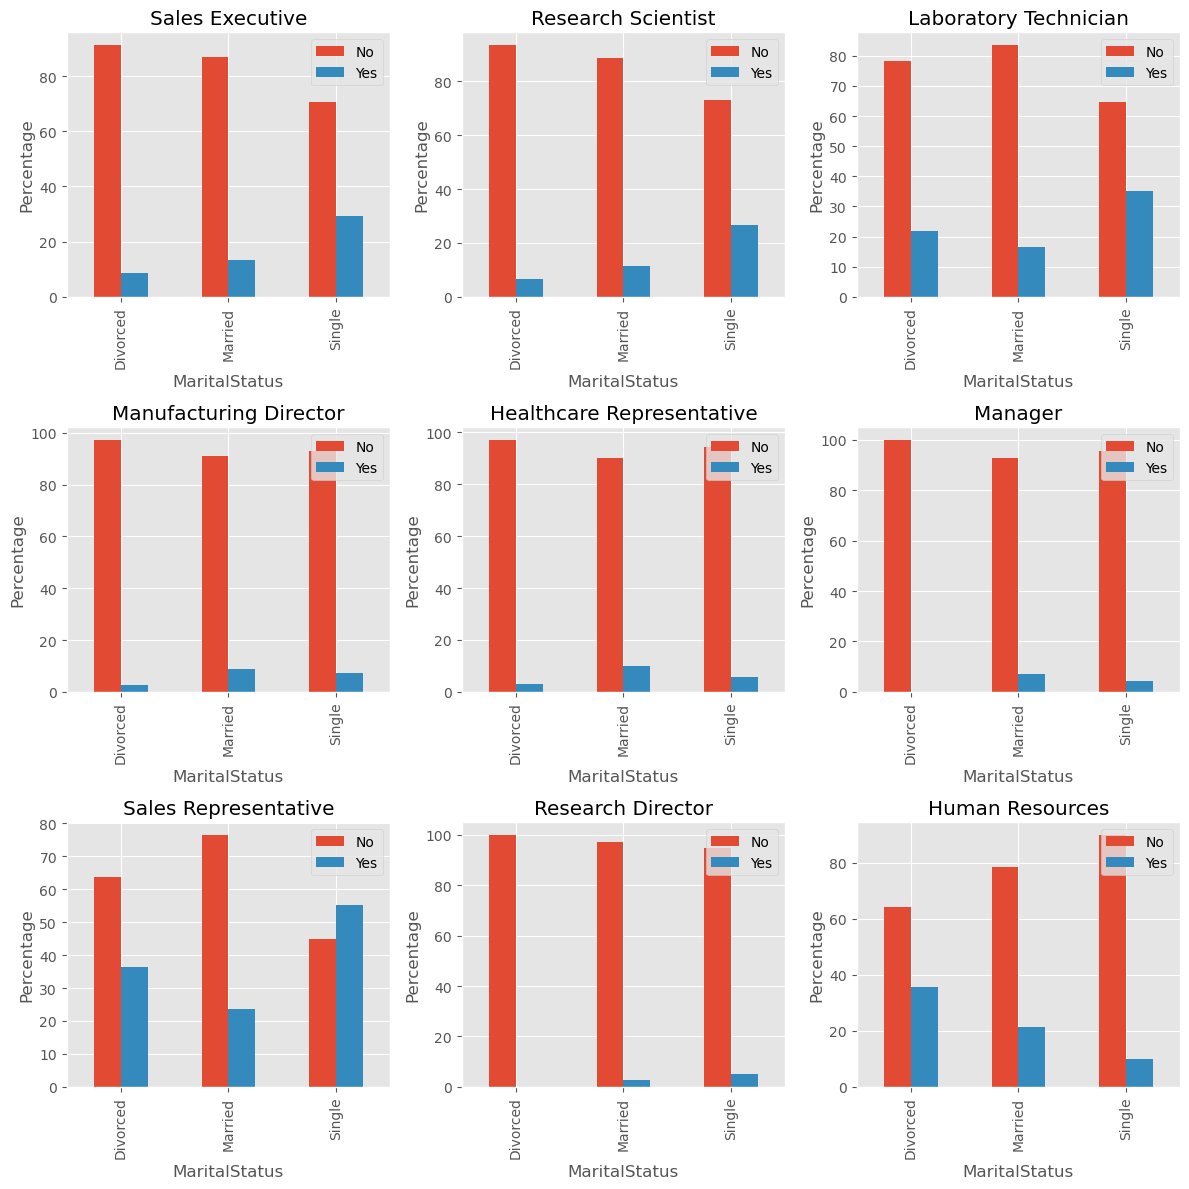

In [97]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
ax=ax.flatten()

for i,job in enumerate(df['JobRole'].unique()):
    cross = pd.crosstab(index=df['MaritalStatus'][df['JobRole']==job],columns=df['Attrition'],normalize='index').round(4)*100
    cross = cross.reset_index()
    cross.plot(kind='bar',x='MaritalStatus',ylabel='Percentage',title=job, ax=ax[i])
    ax[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [98]:
df_salesrep = df[df['JobRole']=='Sales Representative']

In [99]:
df_salesrep.groupby(['MaritalStatus','Attrition'])['EmployeeID'].count().reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_10948\63109454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_salesrep.groupby(['MaritalStatus','Attrition'])['EmployeeID'].count().reset_index()


MaritalStatus Attrition  EmployeeID
0      Divorced        No           7
1      Divorced       Yes           4
2       Married        No          26
3       Married       Yes           8
4        Single        No          17
5        Single       Yes          21

In [100]:
cross = pd.crosstab(index=df_salesrep['MaritalStatus'],
            columns=df_salesrep['Attrition'],normalize='index').round(4)*100
cross

Attrition         No    Yes
MaritalStatus              
Divorced       63.64  36.36
Married        76.47  23.53
Single         44.74  55.26

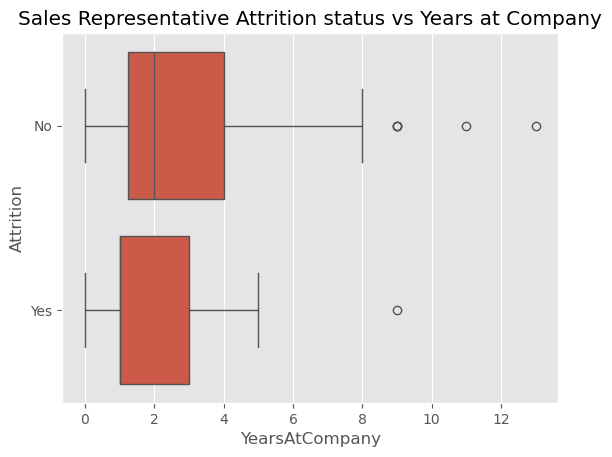

In [101]:
ax = sns.boxplot(data=df[['YearsAtCompany','Attrition']][df['JobRole']=='Sales Representative'],
                 y='Attrition',x='YearsAtCompany')
ax.set(title='Sales Representative Attrition status vs Years at Company')
plt.show()

In [102]:
df[
    (df['JobRole']=='Sales Representative') & 
    (df['Attrition']=='Yes') &
    (df['YearsAtCompany']>8)
]

EmployeeID  Age     BusinessTravel  MonthlyIncome  JobSatisfaction  \
1204        1691   48  Travel_Frequently           2655                3   

      Bonus Department  DistanceFromHome  Education EducationField  \
1204   7965      Sales                 7          2        Medical   

      EnvSatisfaction  Gender               JobRole MaritalStatus  \
1204                4  Female  Sales Representative       Married   

      PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
1204                  3                      3               9   

      YearsSinceLastPromotion OverTime Attrition  
1204                        7      Yes       Yes

<span style='color:blue'> Longest time an employee in SalesRepresentative who resigned stayed in the company was 9 years

In [104]:
df_overtime = df.groupby(['OverTime','JobRole'])['MonthlyIncome'].agg('mean').reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_10948\4226393869.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_overtime = df.groupby(['OverTime','JobRole'])['MonthlyIncome'].agg('mean').reset_index()


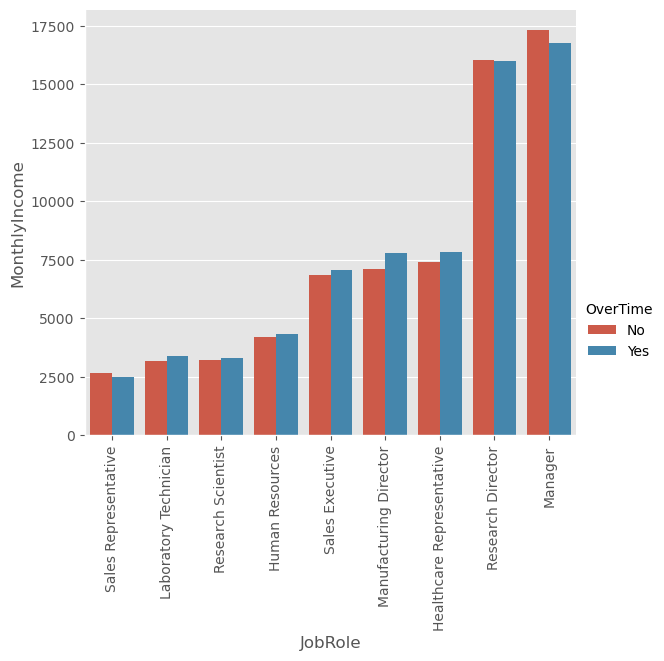

In [105]:
ax = sns.catplot(kind='bar',data=df_overtime,x='JobRole',y='MonthlyIncome',hue='OverTime',aspect=1.2)
ax.set_xticklabels(rotation=90)

In [106]:
df['YearsAtCompany'].agg(['max','min','mean','median'])

max       40.000000
min        0.000000
mean       7.008163
median     5.000000
Name: YearsAtCompany, dtype: float64

In [107]:
df[df['YearsAtCompany']==40]

EmployeeID  Age BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
126         165   58  Travel_Rarely          10312                4  30936   

                 Department  DistanceFromHome  Education EducationField  \
126  Research & Development                23          4        Medical   

     EnvSatisfaction  Gender                    JobRole MaritalStatus  \
126                4  Female  Healthcare Representative       Married   

     PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
126                  3                      3              40   

     YearsSinceLastPromotion OverTime Attrition  
126                       15       No       Yes

<span style='color:blue'> Longest time an employee stayed in company 40 years. Work since 18 years old.

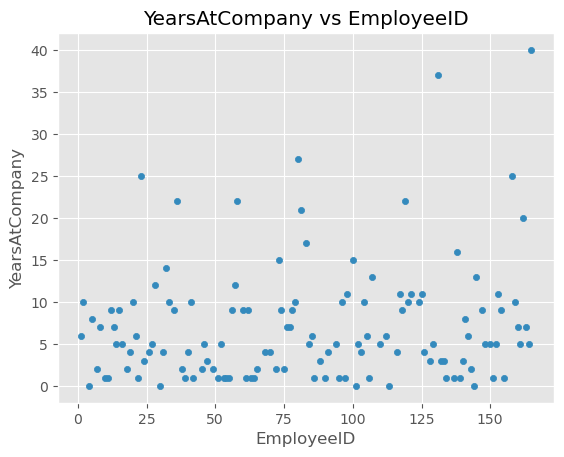

In [109]:
df[df['EmployeeID']<=165].plot(kind='scatter',x='EmployeeID',y='YearsAtCompany',title='YearsAtCompany vs EmployeeID')
plt.show()

<span style='color:blue'> EmployeeID is does not correlate to how long they have been in the company

In [111]:
education_crosstab = pd.crosstab(columns=df['JobRole'],index=df['EducationField'],normalize='index').round(4)*100

In [112]:
education_crosstab

JobRole           Sales Representative  Laboratory Technician  \
EducationField                                                  
Human Resources                   0.00                   0.00   
Life Sciences                     4.46                  19.64   
Marketing                        14.47                   0.00   
Medical                           3.88                  21.34   
Other                             2.44                  26.83   
Technical Degree                  9.85                  14.39   

JobRole           Research Scientist  Human Resources  Sales Executive  \
EducationField                                                           
Human Resources                 0.00            77.78             0.00   
Life Sciences                  21.95             2.15            17.66   
Marketing                       0.00             0.00            76.73   
Medical                        22.20             2.37            14.01   
Other                          20.73             3.66            15.85   
Technical Degree               29.55             3.03            14.39   

JobRole           Manufacturing Director  Healthcare Representative  \
EducationField                                                        
Human Resources                     0.00                       0.00   
Life Sciences                      11.72                       9.90   
Marketing                           0.00                       0.00   
Medical                            11.42                      10.34   
Other                               8.54                      10.98   
Technical Degree                   10.61                      10.61   

JobRole           Research Director  Manager  
EducationField                                
Human Resources                0.00    22.22  
Life Sciences                  5.94     6.60  
Marketing                      0.00     8.81  
Medical                        7.54     6.90  
Other                          4.88     6.10  
Technical Degree               3.79     3.79

In [113]:
pd.crosstab(index=df['JobRole'],columns=df['EducationField'])

EducationField             Human Resources  Life Sciences  Marketing  Medical  \
JobRole                                                                         
Sales Representative                     0             27         23       18   
Laboratory Technician                    0            119          0       99   
Research Scientist                       0            133          0      103   
Human Resources                         21             13          0       11   
Sales Executive                          0            107        122       65   
Manufacturing Director                   0             71          0       53   
Healthcare Representative                0             60          0       48   
Research Director                        0             36          0       35   
Manager                                  6             40         14       32   

EducationField             Other  Technical Degree  
JobRole                                             
Sales Representative           2                13  
Laboratory Technician         22                19  
Research Scientist            17                39  
Human Resources                3                 4  
Sales Executive               13                19  
Manufacturing Director         7                14  
Healthcare Representative      9                14  
Research Director              4                 5  
Manager                        5                 5

In [114]:
education_crosstab = education_crosstab.reset_index()

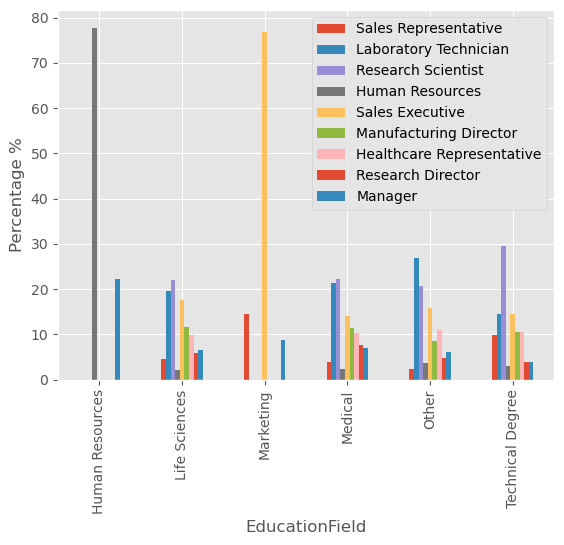

In [115]:
ax = education_crosstab.plot(kind='bar',x='EducationField',ylabel='Percentage %')
ax.legend(loc='upper right')
plt.show()

In [116]:
stats.levene(df['Education'][df['Attrition']=='Yes'],
            df['Education'][df['Attrition']=='No'],
            center='mean')

LeveneResult(statistic=0.00022455319863884266, pvalue=0.9880461043703124)

In [117]:
stats.ttest_ind(df['Education'][df['Attrition']=='Yes'],
            df['Education'][df['Attrition']=='No'],
            equal_var=True)

TtestResult(statistic=-1.2026255155085892, pvalue=0.22931520332230415, df=1468.0)

<span style='color:blue'> Education level does not affect Attrition. pvalue = 0.23 (>0.05)

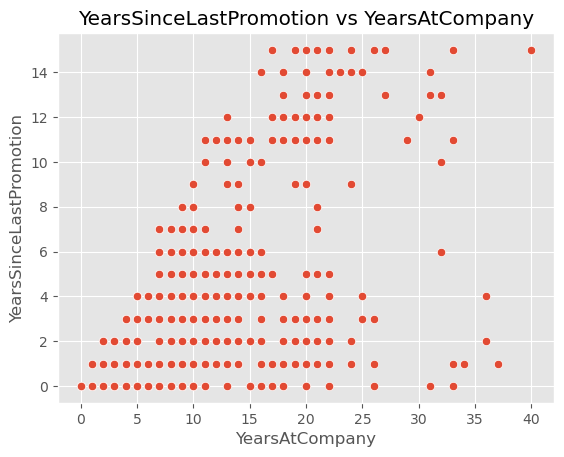

In [119]:
ax = sns.scatterplot(data=df,x='YearsAtCompany',y='YearsSinceLastPromotion')
ax.set(title='YearsSinceLastPromotion vs YearsAtCompany')
plt.show()

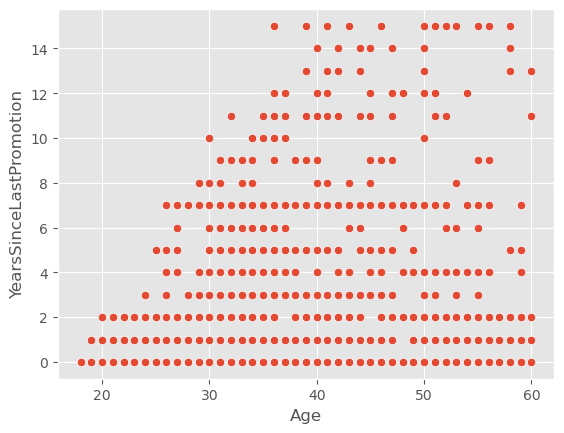

In [120]:
sns.scatterplot(data=df,x='Age',y='YearsSinceLastPromotion')
plt.show()

In [121]:
overall = pd.crosstab(index=df['EnvSatisfaction'], columns=df['JobSatisfaction'],normalize=True)*100
overall

JobSatisfaction         1         2         3         4
EnvSatisfaction                                        
1                3.605442  3.197279  6.802721  5.714286
2                3.741497  4.013605  5.714286  6.054422
3                6.394558  5.918367  8.707483  9.795918
4                5.918367  5.918367  8.843537  9.659864

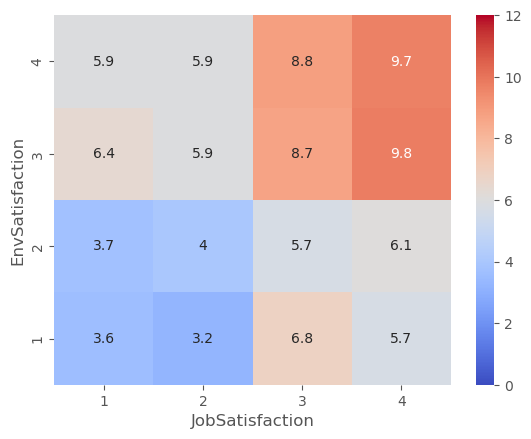

In [122]:
order = [4,3,2,1]
overall = overall.reindex(order)
ax = sns.heatmap(overall,annot=True,cmap='coolwarm',vmin=0,vmax=12)
ax.set(ylabel='EnvSatisfaction')
plt.show()

<span style='color:blue'> Majority employees are satisfied with their job and env

In [124]:
xsatisfy = pd.crosstab(index=df['EnvSatisfaction'][df['Attrition']=='Yes'], columns=df['JobSatisfaction'][df['Attrition']=='Yes'],normalize=True)*100
xsatisfy

JobSatisfaction         1         2         3         4
EnvSatisfaction                                        
1                8.438819  6.751055  9.282700  5.907173
2                5.907173  3.375527  5.485232  3.375527
3                6.751055  5.063291  6.751055  7.594937
4                6.751055  4.219409  9.282700  5.063291

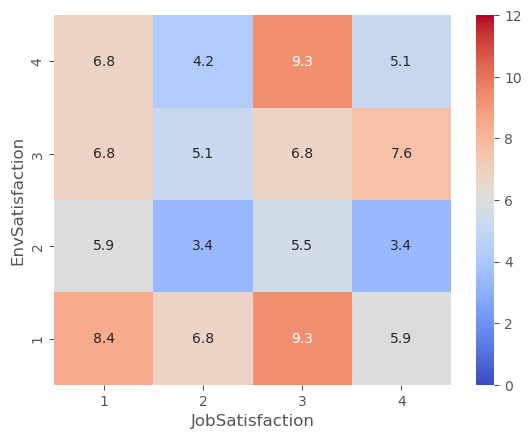

In [125]:
order = [4,3,2,1]
xsatisfy = xsatisfy.reindex(order)
ax = sns.heatmap(xsatisfy,annot=True,cmap='coolwarm',vmin=0,vmax=12)
ax.set(ylabel='EnvSatisfaction')
plt.show()

In [126]:
satisfy = pd.crosstab(index=df['EnvSatisfaction'][df['Attrition']=='No'], columns=df['JobSatisfaction'][df['Attrition']=='No'],normalize=True)*100
satisfy

JobSatisfaction         1         2         3          4
EnvSatisfaction                                         
1                2.676399  2.514193  6.326034   5.677210
2                3.325223  4.136253  5.758313   6.569343
3                6.326034  6.082725  9.083536  10.218978
4                5.758313  6.244931  8.759124  10.543390

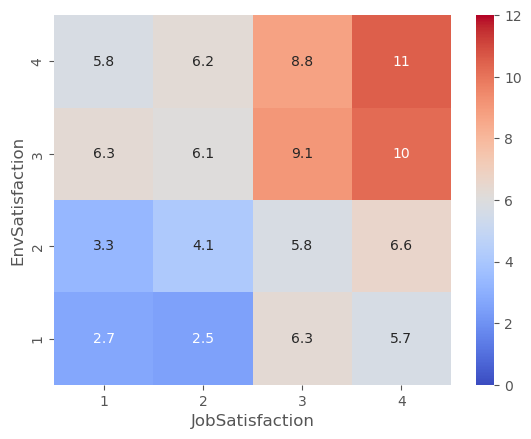

In [127]:
order = [4,3,2,1]
satisfy = satisfy.reindex(order)
ax = sns.heatmap(satisfy,annot=True,cmap='coolwarm',vmin=0,vmax=12)
ax.set(ylabel='EnvSatisfaction')
plt.show()

<span style='color:blue'> Employees attrition 'Yes', tend to have JobSatisfaction 1-3

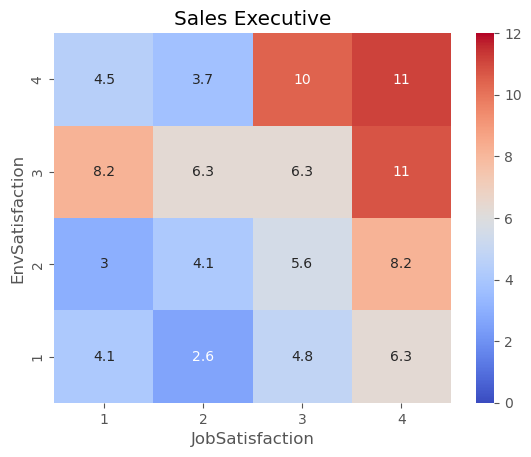

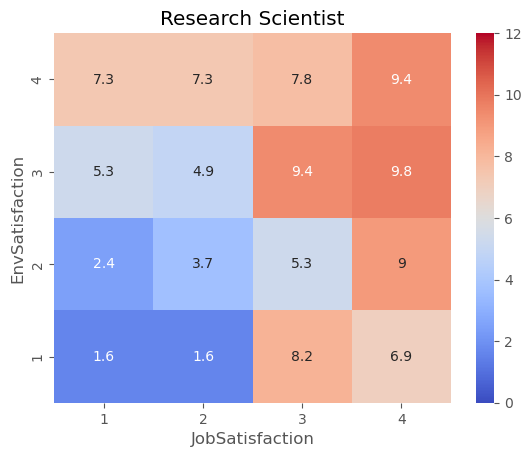

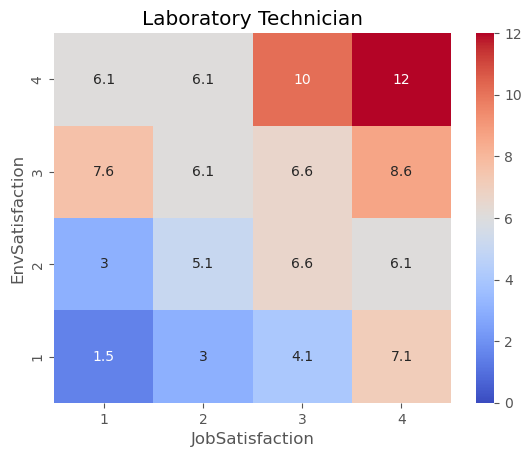

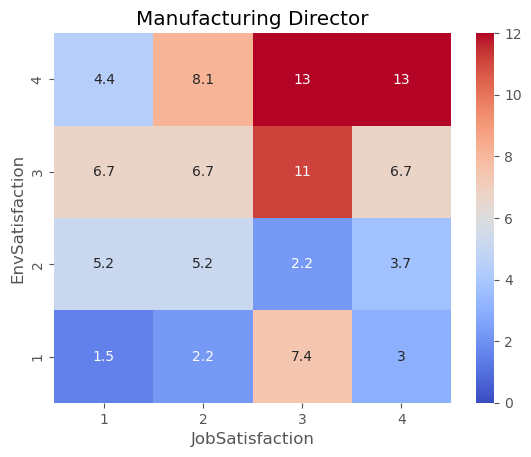

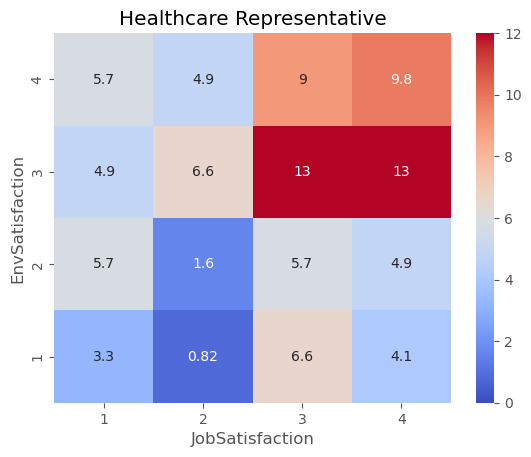

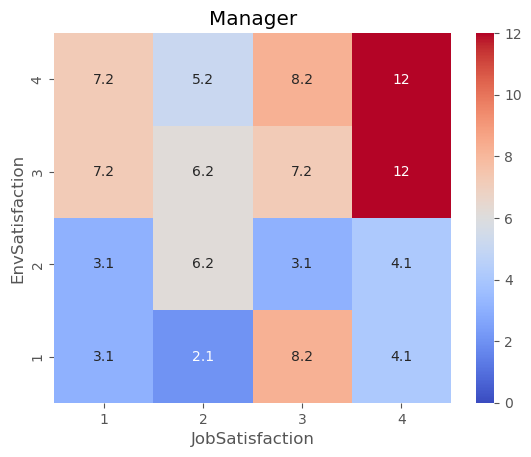

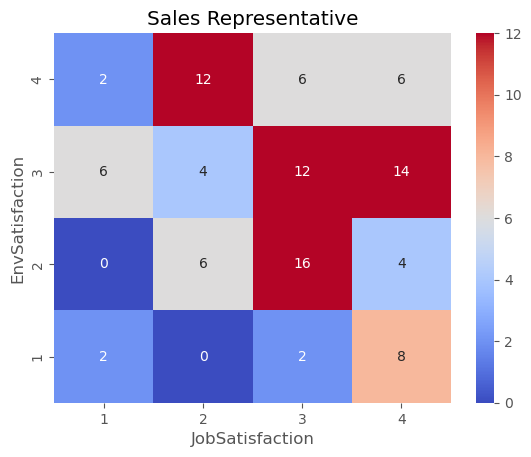

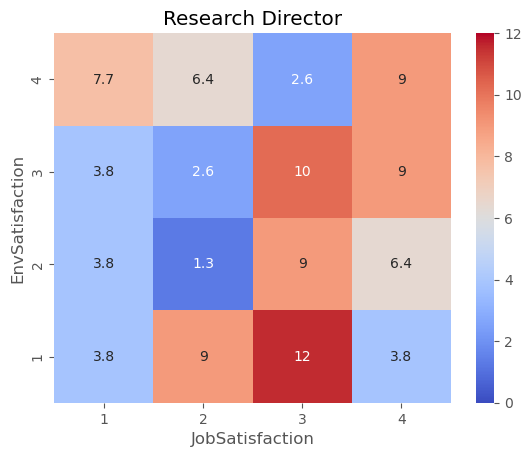

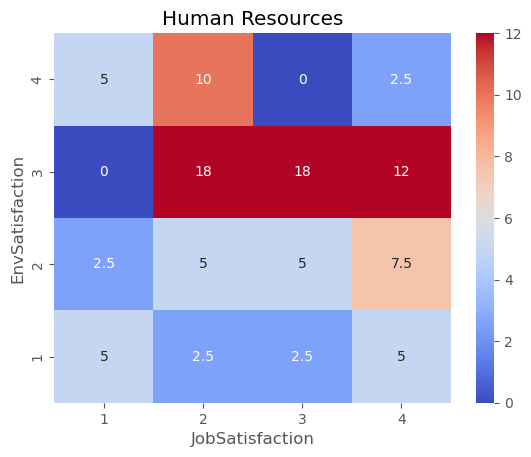

In [129]:
#Env and Job rating for Attrition = 'No'
for job in df['JobRole'].unique():
    satisfy = pd.crosstab(index=df['EnvSatisfaction'][(df['JobRole']==job) & (df['Attrition']=='No')],
                           columns=df['JobSatisfaction'][(df['JobRole']==job) & (df['Attrition']=='No')],
                           normalize=True)*100
    
    order = [4,3,2,1]
    satisfy = satisfy.reindex(order)
    ax = sns.heatmap(satisfy,annot=True,cmap='coolwarm',vmin=0,vmax=12)
    ax.set(title=job,ylabel='EnvSatisfaction')
    plt.show()

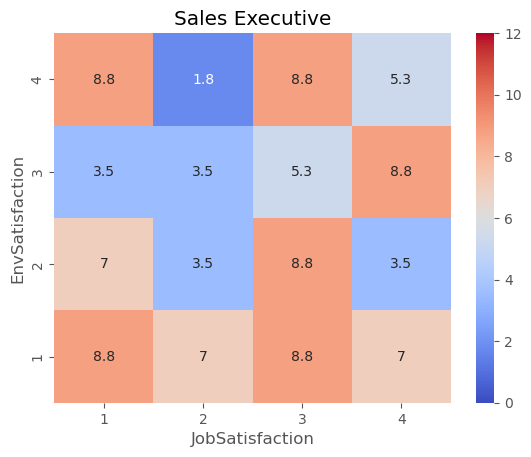

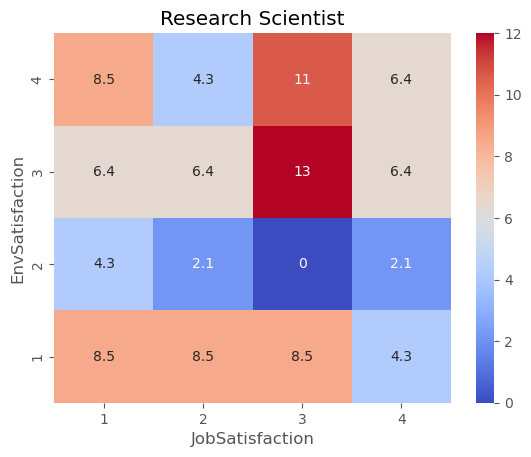

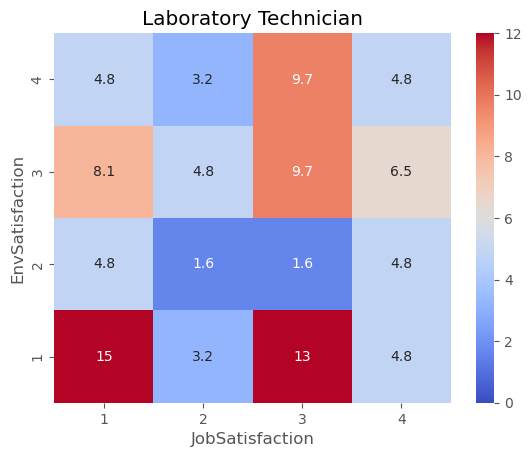

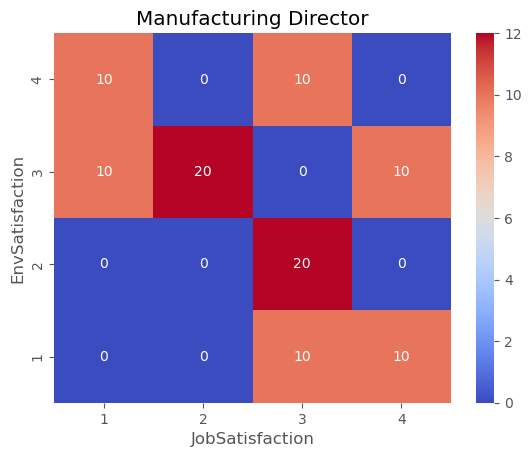

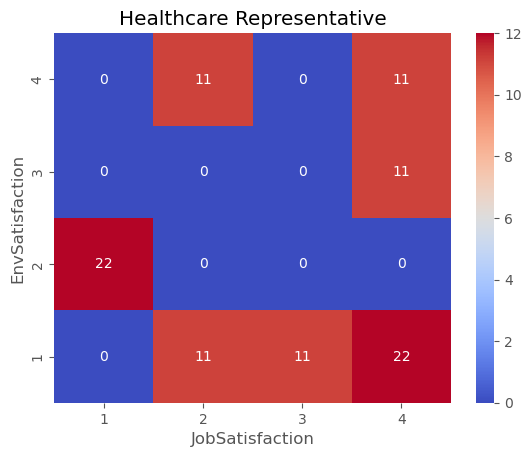

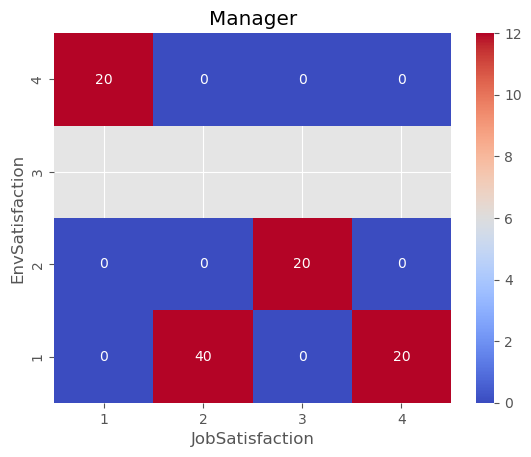

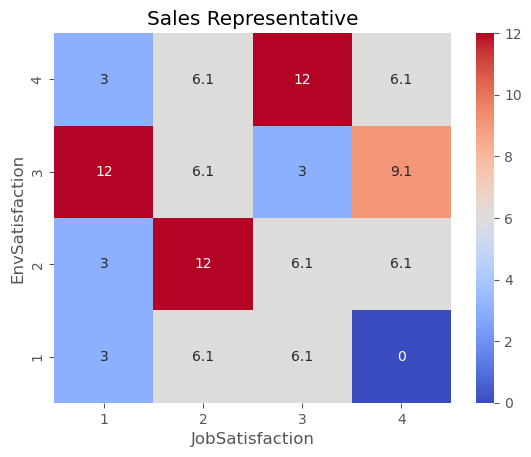

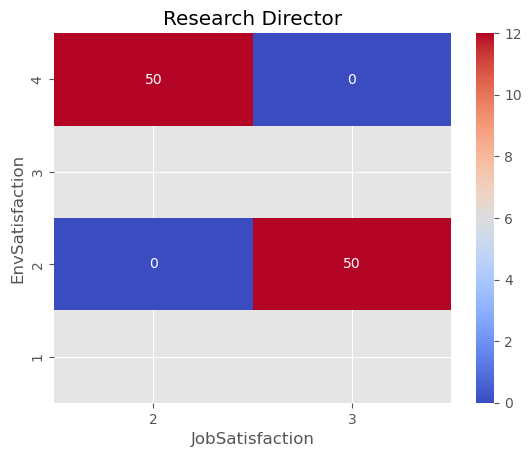

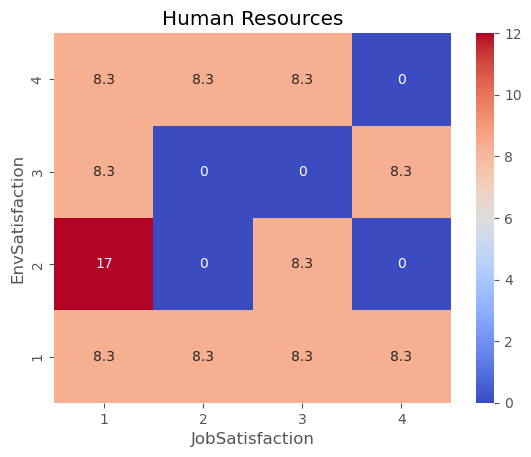

In [130]:
#Env and Job rating for Attrition = 'Yes'
for job in df['JobRole'].unique():
    xsatisfy = pd.crosstab(index=df['EnvSatisfaction'][(df['JobRole']==job) & (df['Attrition']=='Yes')],
                           columns=df['JobSatisfaction'][(df['JobRole']==job) & (df['Attrition']=='Yes')],
                           normalize=True)*100
    
    order = [4,3,2,1]
    xsatisfy = xsatisfy.reindex(order)
    ax = sns.heatmap(xsatisfy,annot=True,cmap='coolwarm',vmin=0,vmax=12)
    ax.set(title=job,ylabel='EnvSatisfaction')
    plt.show()


In [131]:
stats.levene(df['JobSatisfaction'][df['Attrition']=='Yes'],
            df['JobSatisfaction'][df['Attrition']=='No'],
            center='mean')

LeveneResult(statistic=2.4265959250716285, pvalue=0.11950724122969081)

In [132]:
stats.ttest_ind(df['JobSatisfaction'][df['Attrition']=='Yes'],
            df['JobSatisfaction'][df['Attrition']=='No'],
            equal_var=True)

TtestResult(statistic=-3.9862267630568273, pvalue=7.043066741731151e-05, df=1468.0)

<span style='color:blue'> JobSatisfaction level affects Attrition. pvalue = 7E-5 (<0.05)

In [134]:
stats.levene(df['EnvSatisfaction'][df['Attrition']=='Yes'],
            df['EnvSatisfaction'][df['Attrition']=='No'],
            center='mean')

LeveneResult(statistic=13.678094134249502, pvalue=0.00022496812287863818)

In [135]:
stats.ttest_ind(df['EnvSatisfaction'][df['Attrition']=='Yes'],
            df['EnvSatisfaction'][df['Attrition']=='No'],
            equal_var=False)

TtestResult(statistic=-3.7512571857971873, pvalue=0.0002092053345883392, df=316.621272565023)

<span style='color:blue'> EnvSatisfaction level affects Attrition. pvalue = 0.0002 (<0.05)

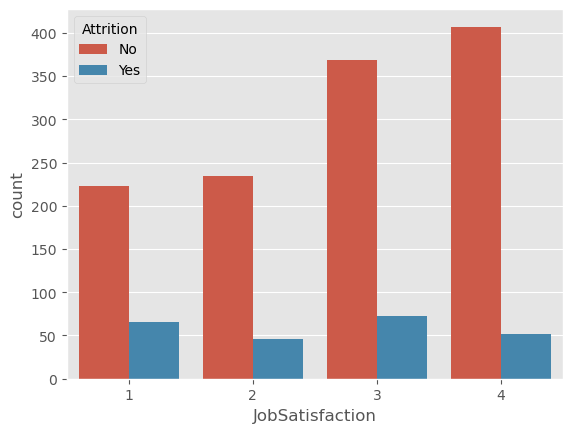

In [137]:
sns.countplot(data=df,x='JobSatisfaction',hue='Attrition')
plt.show()

In [138]:
df_rating = df.copy()

In [139]:
df_rating['Env_Job'] = df_rating['EnvSatisfaction']*df_rating['JobSatisfaction']

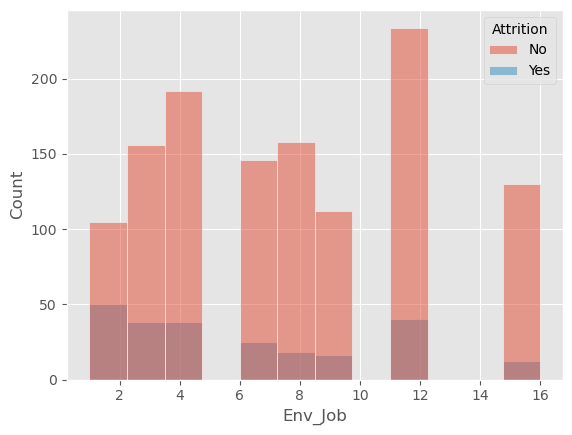

In [140]:
sns.histplot(data=df_rating,x='Env_Job',hue='Attrition')
plt.show()

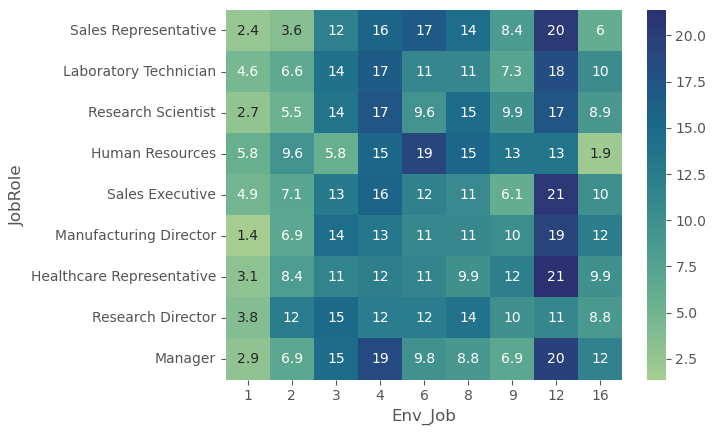

In [141]:
sns.heatmap(pd.crosstab(index=df_rating['JobRole'],
                        columns=df_rating['Env_Job'],
                        normalize='index')*100,annot=True,cmap='crest')
plt.show()

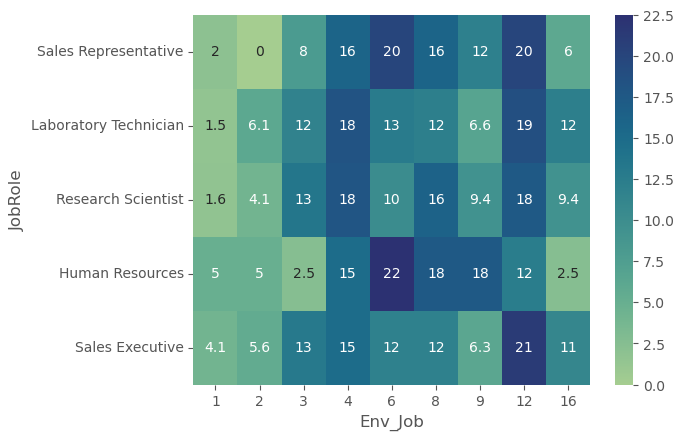

In [142]:
# To check Env x Job score by Job Roles of Attrition No
high = ['Sales Representative','Laboratory Technician','Research Scientist','Human Resources','Sales Executive']
sns.heatmap(pd.crosstab(index=df_rating['JobRole'][(df_rating['Attrition']=='No') & (df_rating['JobRole'].isin(high))],
                        columns=df_rating['Env_Job'][(df_rating['Attrition']=='No') & (df_rating['JobRole'].isin(high))],
                        normalize='index')*100,annot=True,cmap='crest')
plt.show()

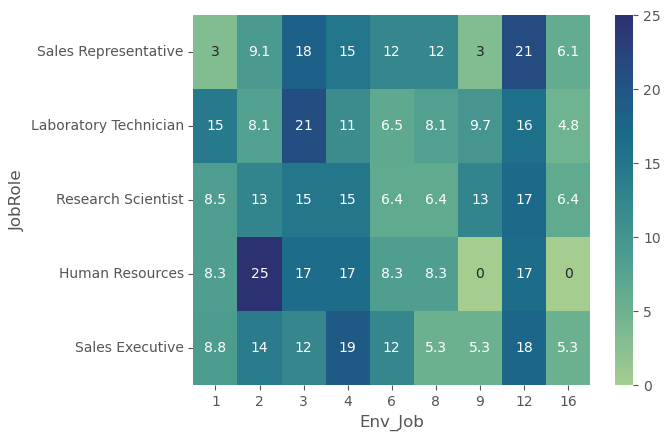

In [143]:
# To check Env x Job score by Job Roles of Attrition Yes
high = ['Sales Representative','Laboratory Technician','Research Scientist','Human Resources','Sales Executive']
sns.heatmap(pd.crosstab(index=df_rating['JobRole'][(df_rating['Attrition']=='Yes') & (df_rating['JobRole'].isin(high))],
                        columns=df_rating['Env_Job'][(df_rating['Attrition']=='Yes') & (df_rating['JobRole'].isin(high))],
                        normalize='index')*100,annot=True,cmap='crest')
plt.show()

<span style='color:blue'> Human Resources who resigned showed lowest Env x Job rating

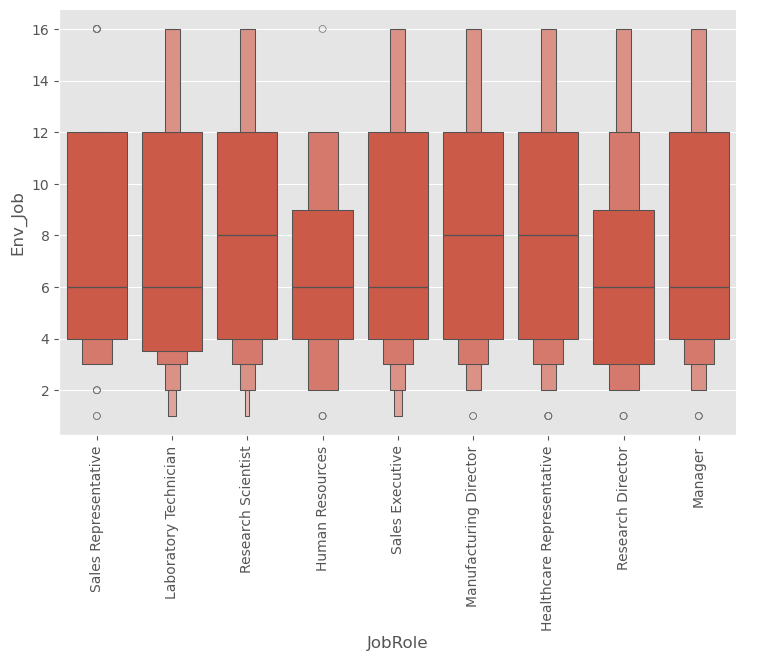

In [145]:
ax = sns.catplot(kind='boxen',data=df_rating,x='JobRole',y='Env_Job',aspect=1.5)
ax.set_xticklabels(rotation=90)
plt.show()

In [146]:
df_rating.groupby('Attrition')['Env_Job'].agg(['mean','median','min','max'])

C:\Users\User\AppData\Local\Temp\ipykernel_10948\2427892657.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rating.groupby('Attrition')['Env_Job'].agg(['mean','median','min','max'])


mean  median  min  max
Attrition                            
No         7.663423     8.0    1   16
Yes        6.143460     4.0    1   16

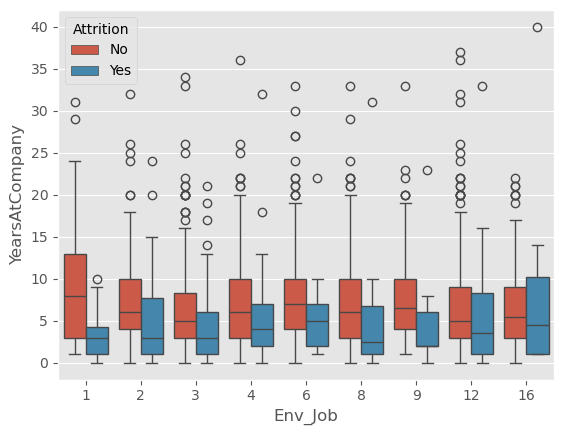

In [147]:
sns.boxplot(data=df_rating,x='Env_Job',y='YearsAtCompany',hue='Attrition')
plt.show()

In [148]:
stats.levene(df_rating['Env_Job'][df['Attrition']=='Yes'],
             df_rating['Env_Job'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=0.3049022403238176, pvalue=0.5809094066851636)

In [149]:
stats.ttest_ind(df_rating['Env_Job'][df['Attrition']=='Yes'],
             df_rating['Env_Job'][df['Attrition']=='No'],
             equal_var=False)

TtestResult(statistic=-4.984241687171068, pvalue=9.94583642111665e-07, df=338.6639412177362)

In [150]:
head_count_department = df.groupby(['Department','JobRole'])['EmployeeID'].count().reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_10948\1460304766.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  head_count_department = df.groupby(['Department','JobRole'])['EmployeeID'].count().reset_index()


In [151]:
head_count_department = head_count_department[-(head_count_department['EmployeeID']==0)].reset_index(drop=True)
head_count_department

Department                    JobRole  EmployeeID
0          Human Resources            Human Resources          52
1          Human Resources                    Manager          11
2   Research & Development      Laboratory Technician         259
3   Research & Development         Research Scientist         292
4   Research & Development     Manufacturing Director         145
5   Research & Development  Healthcare Representative         131
6   Research & Development          Research Director          80
7   Research & Development                    Manager          54
8                    Sales       Sales Representative          83
9                    Sales            Sales Executive         326
10                   Sales                    Manager          37

In [152]:
attrition_department = df.groupby(['Department','JobRole','Attrition'])['EmployeeID'].count().reset_index()
attrition_department = attrition_department[-(attrition_department['EmployeeID']==0)].reset_index(drop=True)
attrition_department = attrition_department.rename(columns={'EmployeeID':'Count'})
attrition_department

C:\Users\User\AppData\Local\Temp\ipykernel_10948\3169489123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_department = df.groupby(['Department','JobRole','Attrition'])['EmployeeID'].count().reset_index()


Department                    JobRole Attrition  Count
0          Human Resources            Human Resources        No     40
1          Human Resources            Human Resources       Yes     12
2          Human Resources                    Manager        No     11
3   Research & Development      Laboratory Technician        No    197
4   Research & Development      Laboratory Technician       Yes     62
5   Research & Development         Research Scientist        No    245
6   Research & Development         Research Scientist       Yes     47
7   Research & Development     Manufacturing Director        No    135
8   Research & Development     Manufacturing Director       Yes     10
9   Research & Development  Healthcare Representative        No    122
10  Research & Development  Healthcare Representative       Yes      9
11  Research & Development          Research Director        No     78
12  Research & Development          Research Director       Yes      2
13  Research & Development                    Manager        No     51
14  Research & Development                    Manager       Yes      3
15                   Sales       Sales Representative        No     50
16                   Sales       Sales Representative       Yes     33
17                   Sales            Sales Executive        No    269
18                   Sales            Sales Executive       Yes     57
19                   Sales                    Manager        No     35
20                   Sales                    Manager       Yes      2

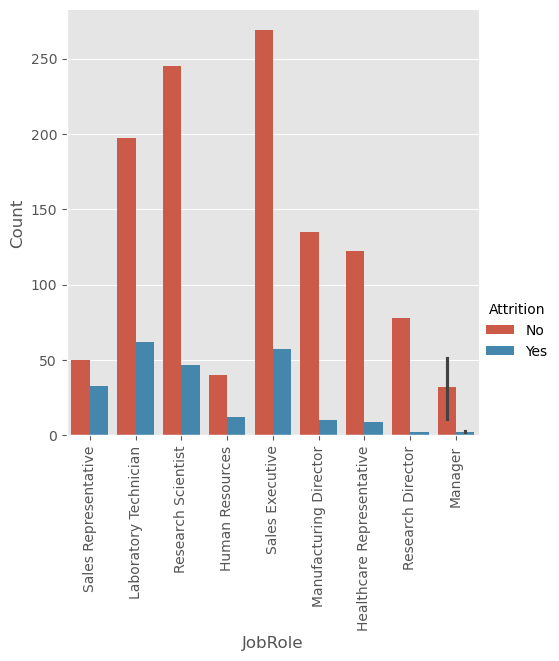

In [153]:
ax = sns.catplot(kind='bar',data=attrition_department,x='JobRole',y='Count',hue='Attrition')
ax.set_xticklabels(rotation=90)

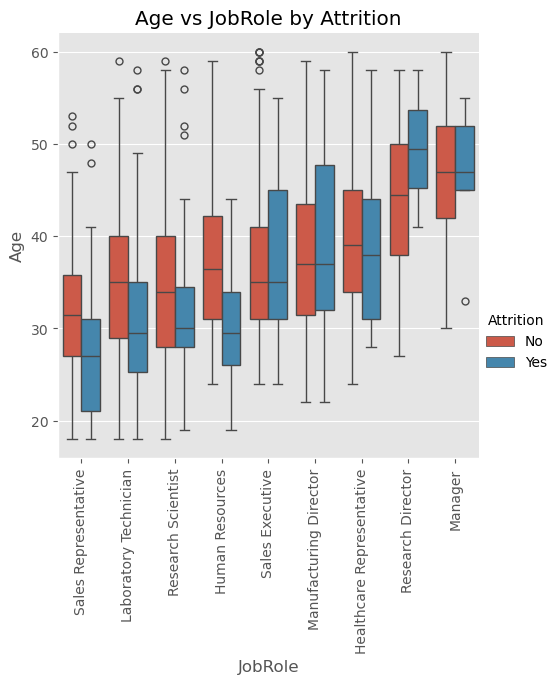

In [154]:
ax = sns.catplot(kind='box',data=df,x='JobRole',y='Age',hue='Attrition')
ax.set(xlabel='JobRole',title='Age vs JobRole by Attrition')
ax.set_xticklabels(rotation=90)
plt.show()

In [155]:
cross = pd.crosstab(index=df['PerformanceRating'],columns=df['Attrition'],normalize='index')*100
cross

Attrition                 No        Yes
PerformanceRating                      
3                  83.922830  16.077170
4                  83.628319  16.371681

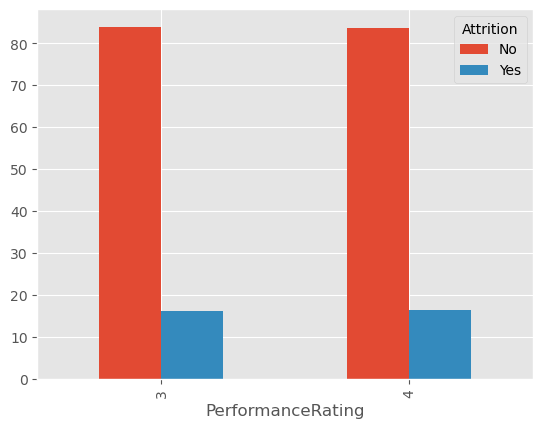

In [156]:
cross.reset_index().plot(kind='bar',x='PerformanceRating')
plt.show()

In [157]:
stats.levene(df['PerformanceRating'][df['Attrition']=='Yes'],
             df['PerformanceRating'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=0.048731447008135365, pvalue=0.8253162347750427)

In [158]:
stats.ttest_ind(df['PerformanceRating'][df['Attrition']=='Yes'],
             df['PerformanceRating'][df['Attrition']=='No'],
             equal_var=True)

TtestResult(statistic=0.11068150493295092, pvalue=0.9118840421069003, df=1468.0)

<span style='color:blue'> Performance rating doesnt affect the Attrition. pvalue = 0.911 (<0.05)

In [160]:
crossTab = pd.crosstab(index=df['PerformanceRating'].map({4:'Yes',3:'No'}),columns=df['Attrition'])
    
crossTab.head()

Attrition            No  Yes
PerformanceRating           
No                 1044  200
Yes                 189   37

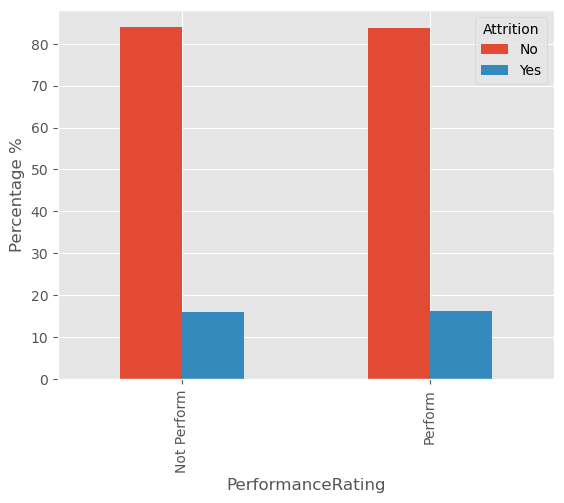

In [161]:
cross = pd.crosstab(index=df['PerformanceRating'].map({4:'Perform',3:'Not Perform'}),
                    columns=df['Attrition'],normalize='index').round(4)*100
cross.reset_index().plot(kind='bar',x='PerformanceRating',ylabel='Percentage %')
plt.show()

In [162]:
stats.chi2_contingency(crossTab)

Chi2ContingencyResult(statistic=0.00015475439428271534, pvalue=0.9900745465934576, dof=1, expected_freq=array([[1043.43673469,  200.56326531],
       [ 189.56326531,   36.43673469]]))

<span style='color:blue'> Performance rating (converted to categorical class) doesnt affect the Attrition. pvalue = 0.99 (<0.05)

In [164]:
df.groupby('Attrition')['Age'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_10948\3296583435.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Attrition')['Age'].describe()


count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

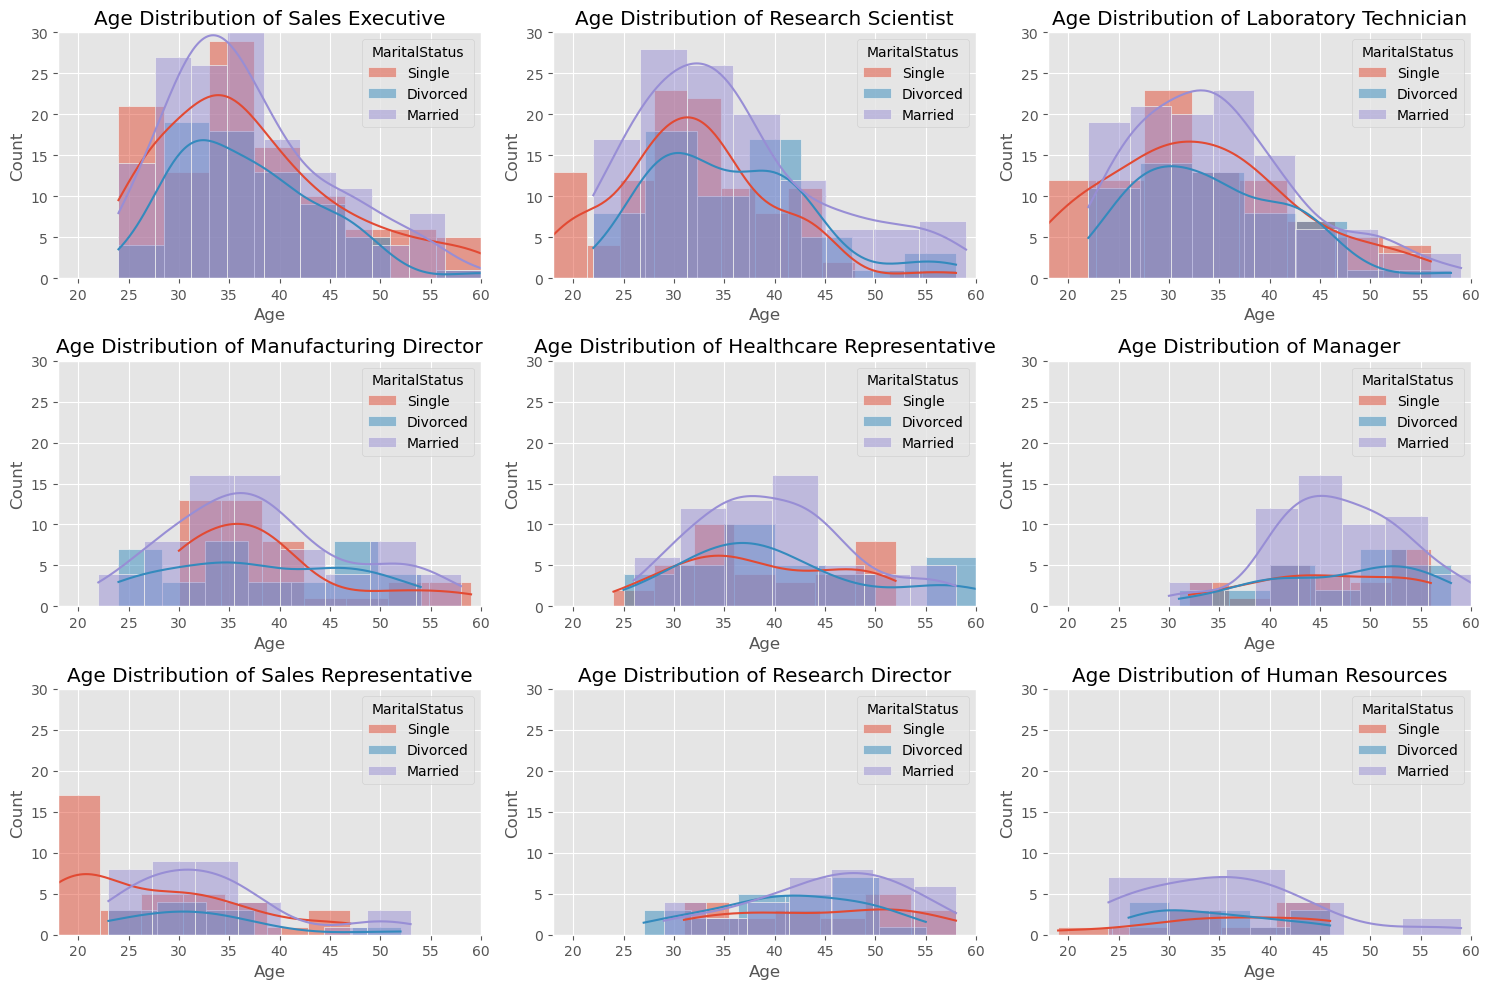

In [165]:
# Get unique job roles and determine the number of subplots needed
job_roles = df['JobRole'].unique()
n_jobs = len(job_roles)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the 3x3 axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDE for each job role
for i, job in enumerate(job_roles):
    ax = axes[i]
    sns.histplot(data=df[(df['JobRole']==job) & (df['MaritalStatus']=='Single')], x='Age', kde=True, label='Single', ax=ax)
    sns.histplot(data=df[(df['JobRole']==job) & (df['MaritalStatus']=='Divorced')], x='Age', kde=True, label='Divorced', ax=ax)
    sns.histplot(data=df[(df['JobRole']==job) & (df['MaritalStatus']=='Married')], x='Age', kde=True, label='Married', ax=ax)
    ax.legend(title='MaritalStatus')
    ax.set(title=f'Age Distribution of {job}')
    ax.set(xlim=(18, 60),ylim=(0,30))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

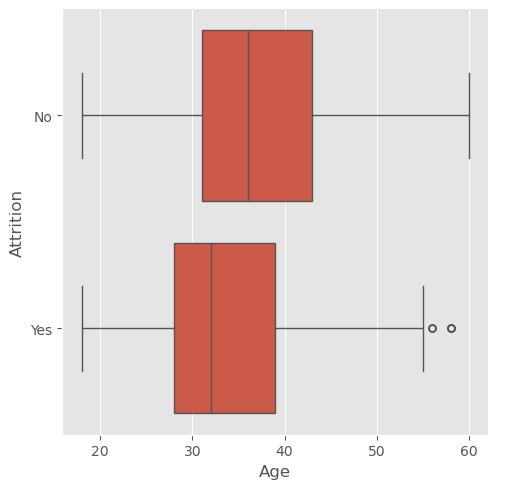

In [166]:
sns.catplot(data=df,kind='box',y='Attrition',x='Age')
plt.show()

In [167]:
stats.levene(df['Age'][df['Attrition']=='Yes'],
             df['Age'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)

In [168]:
stats.ttest_ind(df['Age'][df['Attrition']=='Yes'],
             df['Age'][df['Attrition']=='No'],
             equal_var=True)

TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0)

<span style='color:blue'> Age affects the Attrition. pvalue = 8.36E-10 (<0.05)

In [170]:
df[['MonthlyIncome','YearsAtCompany']].corr()

MonthlyIncome  YearsAtCompany
MonthlyIncome        1.000000        0.514285
YearsAtCompany       0.514285        1.000000

for job in df['JobRole'].unique():
    print(job,'\n',df[['MonthlyIncome','YearsAtCompany']][df['JobRole']==job].corr(),'\n')
    

C:\Users\User\AppData\Local\Temp\ipykernel_10948\1956937557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(data=df,kind='box',y='Attrition',x='YearsAtCompany',palette={'Yes':'steelblue','No':'tomato'})


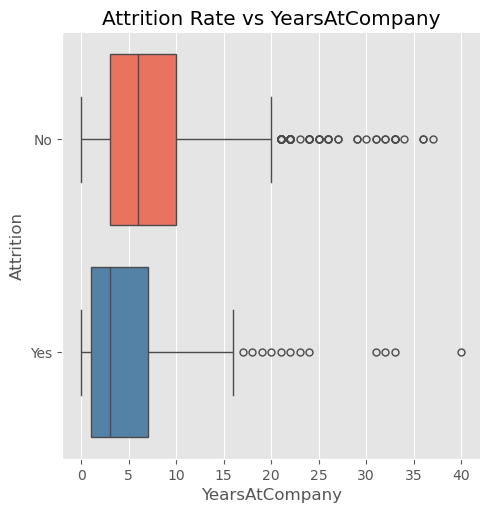

In [172]:
ax = sns.catplot(data=df,kind='box',y='Attrition',x='YearsAtCompany',palette={'Yes':'steelblue','No':'tomato'})
ax.set(title='Attrition Rate vs YearsAtCompany')
plt.show()

In [173]:
stats.levene(df['YearsAtCompany'][df['Attrition']=='Yes'],
             df['YearsAtCompany'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=2.5049476586425445, pvalue=0.11370465713766563)

In [174]:
stats.ttest_ind(df['YearsAtCompany'][df['Attrition']=='Yes'],
             df['YearsAtCompany'][df['Attrition']=='No'],
             equal_var=True)

TtestResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07, df=1468.0)

<span style='color:blue'> YearsAtCompany affects Attrition. pvalue = 2.31E-7 (<0.05)

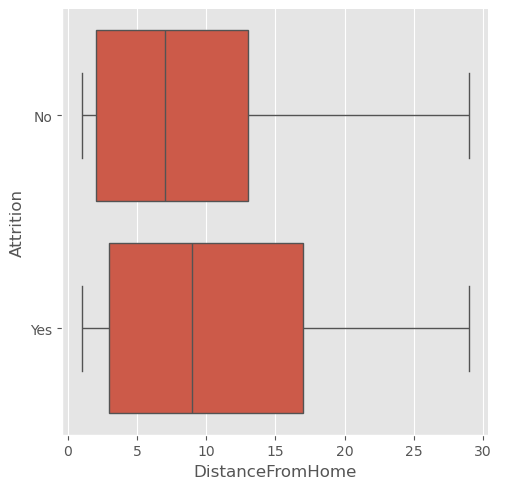

In [176]:
ax = sns.catplot(data=df,kind='box',y='Attrition',x='DistanceFromHome')
plt.show()

In [177]:
stats.levene(df['DistanceFromHome'][df['Attrition']=='Yes'],
             df['DistanceFromHome'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=4.974146689763782, pvalue=0.025879557896104303)

In [178]:
stats.ttest_ind(df['DistanceFromHome'][df['Attrition']=='Yes'],
             df['DistanceFromHome'][df['Attrition']=='No'],
             equal_var=False)

TtestResult(statistic=2.888183062817627, pvalue=0.004136511971511406, df=322.7242793667992)

<span style='color:blue'> DistanceFromHome affects Attrition. pvalue = 0.004 (<0.05)

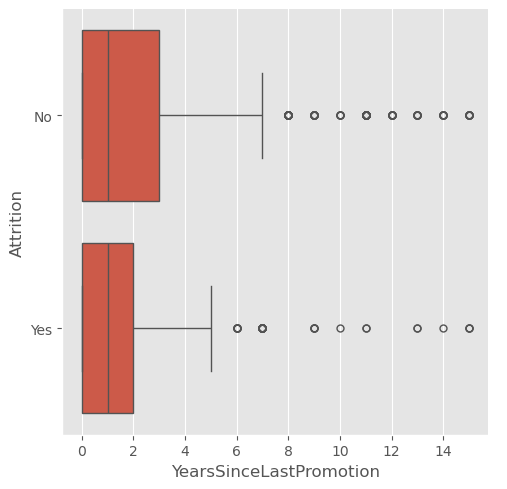

In [180]:
ax = sns.catplot(data=df,kind='box',y='Attrition',x='YearsSinceLastPromotion')
plt.show()

In [181]:
stats.levene(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=1.2865078146687527, pvalue=0.25687769398884447)

In [182]:
stats.ttest_ind(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             equal_var=False)

TtestResult(statistic=-1.2879266009446948, pvalue=0.19865128276906294, df=338.4915945138219)

<span style='color:blue'> YearsSinceLastPromotion does not affects Attrition. pvalue = 0.2 (>0.05)

In [184]:
cols = ['Attrition']
ordercat(df_perform,cols)
ordercat(df_xperform,cols)

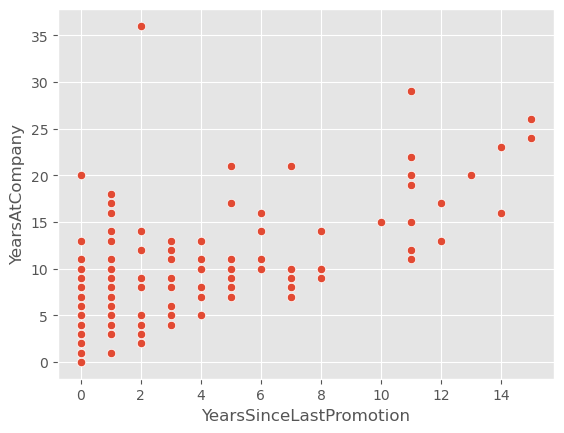

In [185]:
sns.scatterplot(data=df_perform[['YearsSinceLastPromotion','YearsAtCompany']],
                x='YearsSinceLastPromotion',y='YearsAtCompany')
plt.show()

In [186]:
df_perform[['YearsSinceLastPromotion','YearsAtCompany']].corr()

YearsSinceLastPromotion  YearsAtCompany
YearsSinceLastPromotion                 1.000000        0.672627
YearsAtCompany                          0.672627        1.000000

<span style='color:blue'> Relatively high correlation between independant variables YearsSinceLastPromotion vs YearsAtCompany R = 0.67

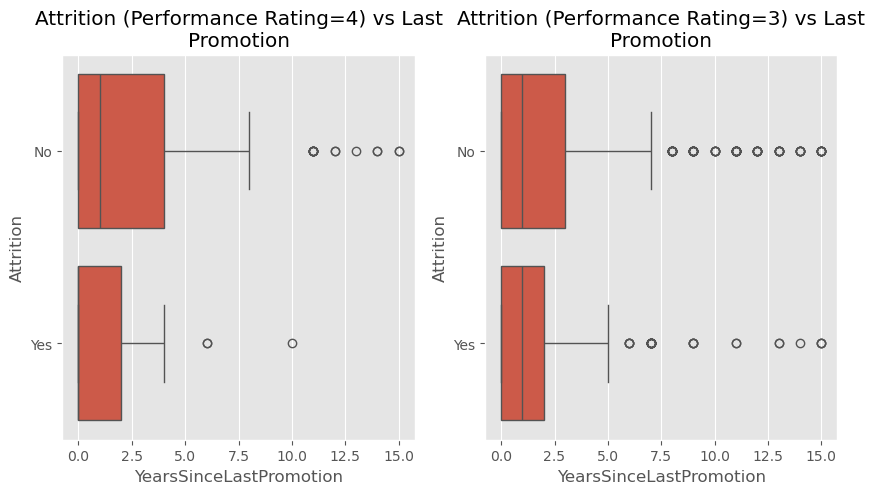

In [188]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df_perform,y='Attrition',x='YearsSinceLastPromotion',ax=ax[0])
ax[0].set_title(wrap_title('Attrition (Performance Rating=4) vs Last Promotion',40))

sns.boxplot(data=df_xperform,y='Attrition',x='YearsSinceLastPromotion',ax=ax[1])
ax[1].set_title(wrap_title('Attrition (Performance Rating=3) vs Last Promotion',40))


plt.show()

In [189]:
stats.levene(df_perform['YearsSinceLastPromotion'][df_perform['Attrition']=='Yes'],
            df_perform['YearsSinceLastPromotion'][df_perform['Attrition']=='No'],
            center='mean')

LeveneResult(statistic=9.964626991992441, pvalue=0.001815123063855998)

In [190]:
stats.ttest_ind(df_perform['YearsSinceLastPromotion'][df_perform['Attrition']=='Yes'],
            df_perform['YearsSinceLastPromotion'][df_perform['Attrition']=='No'],
            equal_var=False)

TtestResult(statistic=-2.8181010666302293, pvalue=0.006079977289225715, df=80.29851688588859)

<span style='color:blue'> YearsSinceLastPromotion affects Attrition for those with performance rating of 4. pvalue = 0.006 (<0.05)

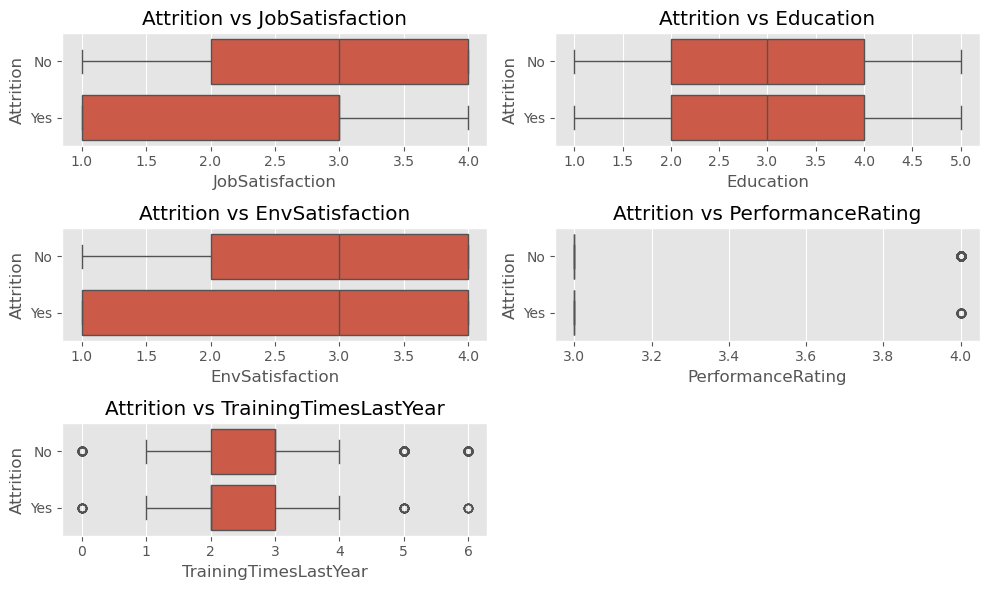

In [192]:
cols = ['JobSatisfaction','Education','EnvSatisfaction','PerformanceRating','TrainingTimesLastYear']

fig, ax = plt.subplots(3,2, figsize=(10,6))
ax = ax.flatten()

for i,col in enumerate(cols):
    sns.boxplot(data=df,y='Attrition',x=col, ax=ax[i])
    ax[i].set_title(f'Attrition vs {col}')

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()    
plt.show()

In [193]:
stats.levene(df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
            df['TrainingTimesLastYear'][df['Attrition']=='No'],
            center='mean')

LeveneResult(statistic=0.0009627467164361536, pvalue=0.9752512997636223)

In [194]:
stats.ttest_ind(df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
            df['TrainingTimesLastYear'][df['Attrition']=='No'],
            equal_var=True)

TtestResult(statistic=-2.28290299236669, pvalue=0.022578499737201205, df=1468.0)

<span style='color:blue'> TrainingTimesLastYear level affects Attrition. pvalue = 0.02 (<0.05)

In [196]:
df.select_dtypes('object').columns

Index(['Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime'], dtype='object')

In [197]:
cols = ['BusinessTravel']
ordercat(df,cols)

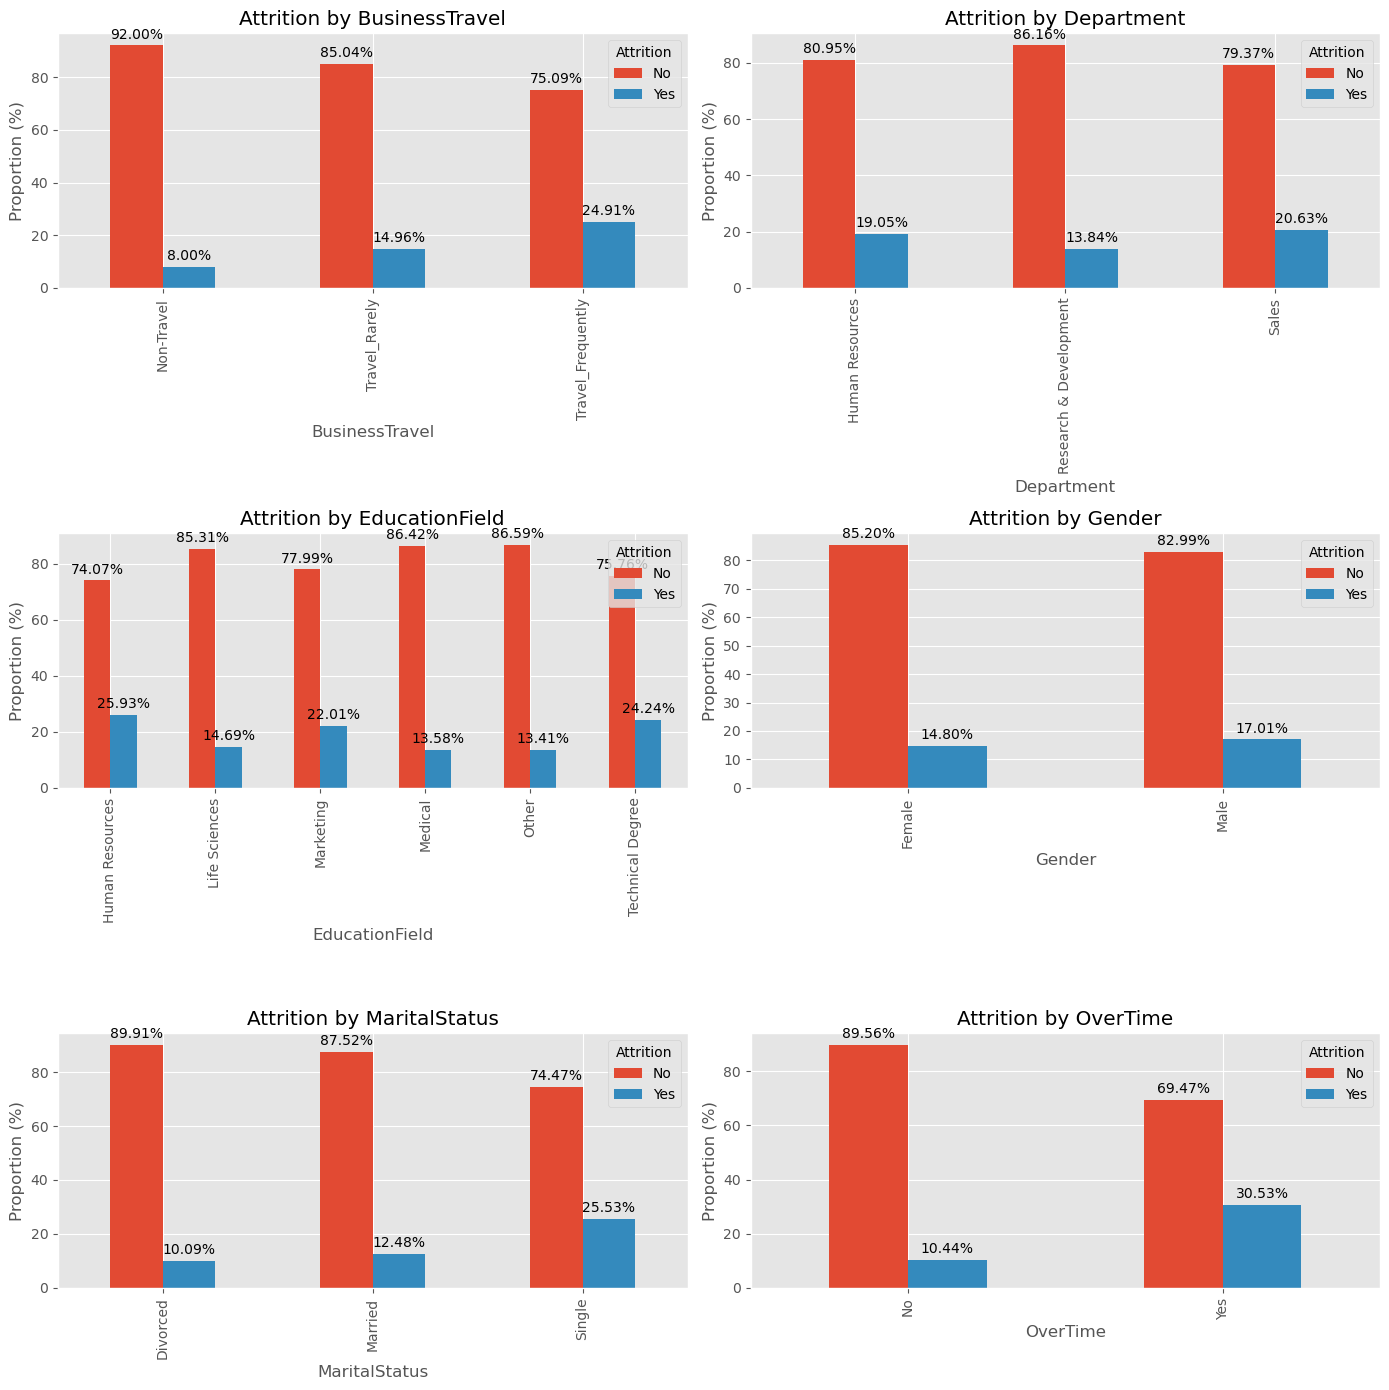

In [198]:
cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'MaritalStatus', 'OverTime']
fig, ax = plt.subplots(3,2, figsize=(14,14))
ax = ax.flatten()

# Create and plot the crosstabs
for i, col in enumerate(cols):
    x = pd.crosstab(index=df[col], columns=df['Attrition'], normalize='index').round(4)*100
    x = x.reset_index()
    x.plot(kind='bar',x=col, ax=ax[i])
    ax[i].set_title(f'Attrition by {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Proportion (%)')
    
    # Display percentage labels on bars
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height():.2f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')
plt.tight_layout()
plt.show()

In [199]:
travel_crosstab = pd.crosstab(index=df['BusinessTravel'],columns=df['Attrition'])

In [200]:
stats.chi2_contingency(travel_crosstab)

Chi2ContingencyResult(statistic=24.18241368565517, pvalue=5.608614476449942e-06, dof=2, expected_freq=array([[125.81632653,  24.18367347],
       [874.84285714, 168.15714286],
       [232.34081633,  44.65918367]]))

<span style='color:blue'> BusinessTravel affects Attrition. pvalue = 5.6E-6 (<0.05)

In [202]:
department_crosstab = pd.crosstab(index=df['Department'],columns=df['Attrition'])

In [203]:
cross = pd.crosstab(index=df['Department'],columns=df['Attrition'],normalize='index').round(4)*100

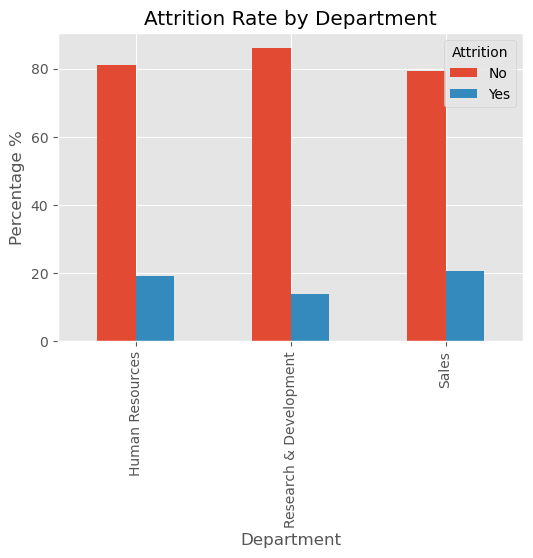

In [204]:
cross.reset_index().plot(kind='bar',x='Department', 
                         ylabel='Percentage %',figsize=(6,4),
                        title='Attrition Rate by Department')
plt.show()

In [205]:
stats.chi2_contingency(department_crosstab)

Chi2ContingencyResult(statistic=10.79600732241067, pvalue=0.004525606574479633, dof=2, expected_freq=array([[ 52.84285714,  10.15714286],
       [806.06326531, 154.93673469],
       [374.09387755,  71.90612245]]))

<span style='color:blue'> Department affects Attrition. pvalue = 0.0045 (<0.05)

In [207]:
education_crosstab = pd.crosstab(index=df['EducationField'],columns=df['Attrition'])

In [208]:
cross = pd.crosstab(index=df['EducationField'],columns=df['Attrition'],normalize='index').round(4)*100

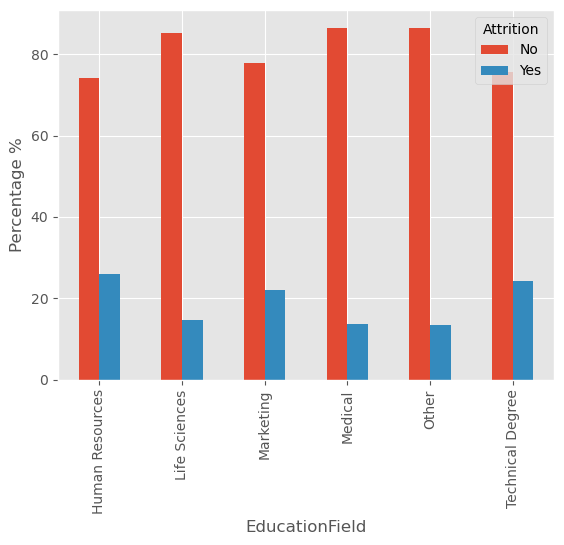

In [209]:
cross.reset_index().plot(kind='bar',x='EducationField',ylabel='Percentage %')
plt.show()

In [210]:
cross

Attrition            No    Yes
EducationField                
Human Resources   74.07  25.93
Life Sciences     85.31  14.69
Marketing         77.99  22.01
Medical           86.42  13.58
Other             86.59  13.41
Technical Degree  75.76  24.24

In [211]:
stats.chi2_contingency(education_crosstab)

Chi2ContingencyResult(statistic=16.024674119585427, pvalue=0.006773980139025212, dof=5, expected_freq=array([[ 22.64693878,   4.35306122],
       [508.29795918,  97.70204082],
       [133.36530612,  25.63469388],
       [389.19183673,  74.80816327],
       [ 68.77959184,  13.22040816],
       [110.71836735,  21.28163265]]))

<span style='color:blue'> EducationField affects Attrition. pvalue = 0.007 (<0.05)

In [213]:
gender_crosstab = pd.crosstab(index=df['Gender'],columns=df['Attrition'])

In [214]:
cross = pd.crosstab(index=df['Gender'],columns=df['Attrition'],normalize='index').round(4)*100

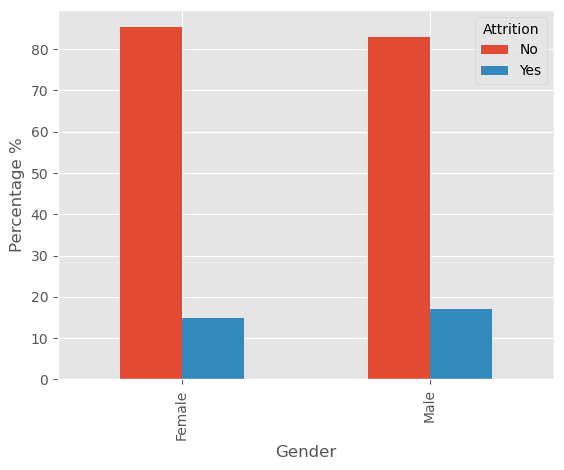

In [215]:
cross.reset_index().plot(kind='bar',x='Gender',ylabel='Percentage %')
plt.show()

In [216]:
stats.chi2_contingency(gender_crosstab)

Chi2ContingencyResult(statistic=1.1169671241970975, pvalue=0.29057244902890855, dof=1, expected_freq=array([[493.2,  94.8],
       [739.8, 142.2]]))

<span style='color:blue'> Gender doenst affect Attrition. pvalue = 0.29 (>0.05)

In [218]:
status_crosstab = pd.crosstab(index=df['MaritalStatus'],columns=df['Attrition'])

In [219]:
stats.chi2_contingency(status_crosstab)

Chi2ContingencyResult(statistic=46.163676540848705, pvalue=9.45551106034083e-11, dof=2, expected_freq=array([[274.27959184,  52.72040816],
       [564.49591837, 108.50408163],
       [394.2244898 ,  75.7755102 ]]))

<span style='color:blue'> MaritalStatus affects Attrition. pvalue = 9.45E-11 (<0.05)

In [221]:
ot_crosstab = pd.crosstab(index=df['OverTime'],columns=df['Attrition'])

In [222]:
stats.chi2_contingency(ot_crosstab)

Chi2ContingencyResult(statistic=87.56429365828768, pvalue=8.15842372153832e-21, dof=1, expected_freq=array([[884.06938776, 169.93061224],
       [348.93061224,  67.06938776]]))

<span style='color:blue'> OverTime affects Attrition. pvalue = 8.15E-21 (<0.05)

In [224]:
df_fresh = df[
    (df['Age']>=18) & (df['Age']<=21) &
    (df['MaritalStatus']=='Single') &
    ((df['JobRole']=='Sales Representative') |
    (df['JobRole']=='Laboratory Technician') |
    (df['JobRole']=='Research Scientist'))].reset_index(drop=True).copy()

In [225]:
df_fresh['JobRole'] = df_fresh['JobRole'].astype('str')

In [226]:
df_fresh.groupby(['JobRole','Attrition'])['EmployeeID'].count().reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_10948\3112291187.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fresh.groupby(['JobRole','Attrition'])['EmployeeID'].count().reset_index()


JobRole Attrition  EmployeeID
0  Laboratory Technician        No           3
1  Laboratory Technician       Yes           7
2     Research Scientist        No           9
3     Research Scientist       Yes           4
4   Sales Representative        No           7
5   Sales Representative       Yes          10

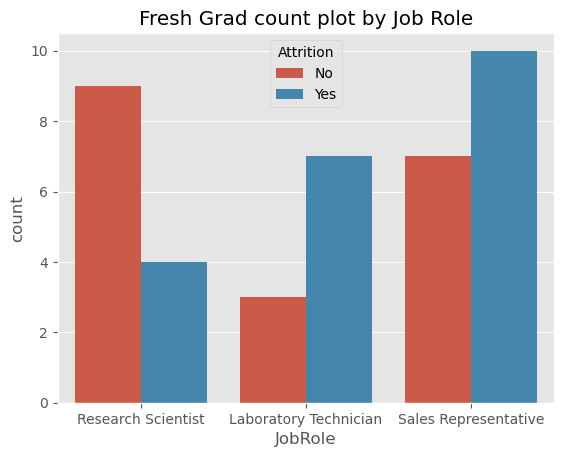

In [227]:
ax = sns.countplot(data=df_fresh,x='JobRole',hue='Attrition')
ax.set(title='Fresh Grad count plot by Job Role')
plt.show()

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">EDA SUMMARY<a id='6'></a></p>

From univariate analysis, we understand from the dataset :
- 📌 Attrition rate is 16.12%
- 📌 Employee mostly from Research&Development department (65%)
- 📌 Most employee Travel_Rarely (71%)
- 📌 Employee education background mostly Life Science (41%) and Medical (32%) 
- 📌 More male employee (60%) compared to female (40%)
- 📌 Most emplyoee are married (46%)
- 📌 28% of employeed work Overtime 
- 📌 Highest employee headcount in Sales Executive role (22%)
- 📌 Employee Age between 18-60 years old (mean:37 yo, median:36 yo). Distribution skewed right
- 📌 TrainingTimesLastYear 0-6 times (mean:3, median:3). Normal distribution
- 📌 MonthlyIncome between 1009-19999 dollars (mean:6503, median:4919). Distribution skewed right
- 📌 Bonus between 3027-79892 dollars (mean:20480, median:15484). Distribution skewed right
- 📌 YearsAtCompany between 0-40 years (mean:7, median:5). Distribution skewed right
- 📌 YearsSinceLastPromotion between 0-15 years (mean:2.2, median:1). Distribution skewed right
- 📌 Eduction level between 1-5 (mean:3, median:3). Normal distribution
- 📌 EnvSatisfaction level between 1-4 (mean:3, median:3). Normal distribution
- 📌 JobSatisfaction level between 1-4 (mean:3, median:3). Normal distribution
- 📌 Performance rating between 3-4. 15% of the employees performing well

From multivariate analysis, we understand from the dataset :
- 📌 Bonus and MonthlyIncome directly correlated to each other when groupby PerformanceRating R = 1**
- 📌 Employees PerformanceRating 4 have higher bonus and monthly income
- 📌 MonthlyIncome affects Attrition. pvalue = 4.43E-13 (<0.05)
- 📌 Age affects the Attrition. pvalue = 8.36E-10 (<0.05)
- 📌 Bonus affects the Attrition. pvalue = 3.69E-14 (<0.05)
- 📌 Jobrole affects Attrition. pvalue = 2.75E-15 (<0.05)
- 📌 YearsAtCompany affects Attrition. pvalue = 2.31E-7 (<0.05)
- 📌 DistanceFromHome affects Attrition. pvalue = 0.004 (<0.05)
- 📌 YearsSinceLastPromotion does not affects Attrition. pvalue = 0.2 (>0.05)**
- 📌 YearsSinceLastPromotion affects Attrition for performance rating of 4. pvalue = 0.006 (<0.05)
- 📌 High correlation between YearsSinceLastPromotion vs YearsAtCompany R = 0.67**
- 📌 JobSatisfaction level affects Attrition. pvalue = 7E-5 (<0.05)
- 📌 Education level does not affect Attrition. pvalue = 0.23 (>0.05)**
- 📌 EnvSatisfaction level affects Attrition. pvalue = 0.0002 (<0.05)
- 📌 BusinessTravel affects Attrition. pvalue = 5.6E-6 (<0.05)
- 📌 Department affects Attrition. pvalue = 0.0045 (<0.05)
- 📌 EducationField affects Attrition. pvalue = 0.007 (<0.05)
- 📌 Gender doenst affect Attrition. pvalue = 0.29 (>0.05)**
- 📌 MaritalStatus affects Attrition. pvalue = 9.45E-11 (<0.05)
- 📌 OverTime affects Attrition. pvalue = 8.15E-21 (<0.05)
- 📌 Performance rating doesnt affect the Attrition. pvalue = 0.911 (>0.05)**
- 📌 TrainingTimesLastYear level affects Attrition. pvalue = 0.02 (<0.05)


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA PREPARATION FOR MODELLING<a id='7'></a></p>

In [232]:
# Functions is used to easy trial and error
def remove_outliers(df, features):
    for feature in features:
        # Using IQR method
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

def replace_outliers_with_mean(df, features):
    df = df.copy()  # Make a copy to avoid modifying the original DataFrame
    for feature in features:
        # Compute the IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compute the mean of the feature
        mean_value = df[feature].mean()
        
        # Replace outliers with mean value
        df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), mean_value, df[feature])
        
    return df

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               1470 non-null   int64   
 1   Age                      1470 non-null   int64   
 2   BusinessTravel           1470 non-null   category
 3   MonthlyIncome            1470 non-null   int64   
 4   JobSatisfaction          1470 non-null   int64   
 5   Bonus                    1470 non-null   int64   
 6   Department               1470 non-null   object  
 7   DistanceFromHome         1470 non-null   int64   
 8   Education                1470 non-null   int64   
 9   EducationField           1470 non-null   object  
 10  EnvSatisfaction          1470 non-null   int64   
 11  Gender                   1470 non-null   object  
 12  JobRole                  1470 non-null   category
 13  MaritalStatus            1470 non-null   object  
 14  Performa

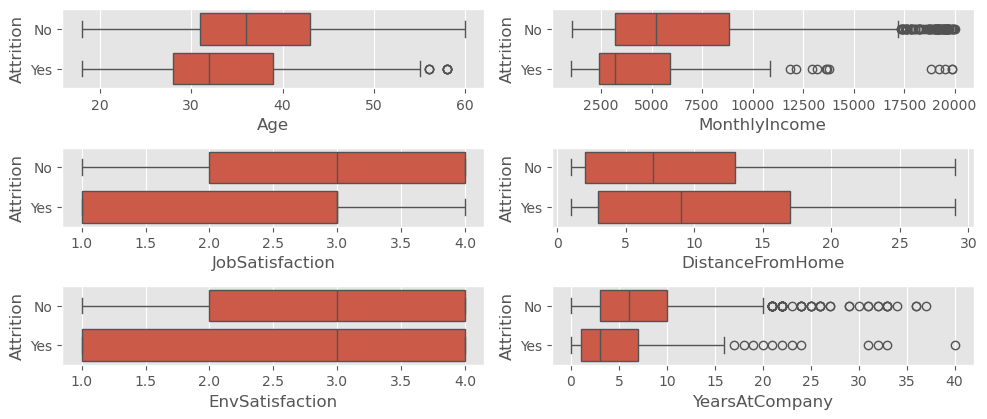

In [234]:
# To visualize outliers
cols = ['Age', 'MonthlyIncome', 'JobSatisfaction',
       'DistanceFromHome', 'EnvSatisfaction',
       'YearsAtCompany']
fig, ax = plt.subplots(6,2, figsize=(10,8))
ax=ax.ravel()

for i,col in enumerate(cols):
    sns.boxplot(data=df,x=col,y='Attrition',ax=ax[i])

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [235]:
print('Before Remove Outliase \n')
print(df.groupby('Attrition')['MonthlyIncome'].count(),'\n')

Before Remove Outliase 

Attrition
No     1233
Yes     237
Name: MonthlyIncome, dtype: int64 



C:\Users\User\AppData\Local\Temp\ipykernel_10948\57596484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Attrition')['MonthlyIncome'].count(),'\n')


#to replace outliers with mean
features_with_outliers = ['MonthlyIncome', 'YearsAtCompany']

#Apply the function to the DataFrame
df = replace_outliers_with_mean(df, features_with_outliers).reset_index(drop=True).copy()


In [237]:
#to remove outliers
features_with_outliers = ['MonthlyIncome',#'TrainingTimesLastYear',
                          'YearsAtCompany'
                         ]

df = remove_outliers(df,features_with_outliers).reset_index(drop=True).copy()

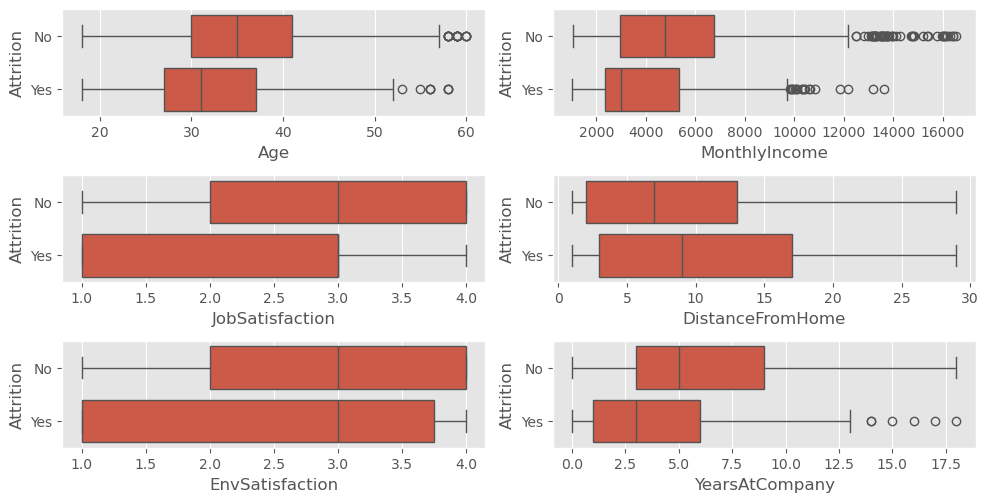

In [238]:
# To visualize after treating outliers
cols = ['Age', 'MonthlyIncome', 'JobSatisfaction',
       'DistanceFromHome', 'EnvSatisfaction',
       'YearsAtCompany']
fig, ax = plt.subplots(5,2, figsize=(10,8))
ax=ax.ravel()

for i,col in enumerate(cols):
    sns.boxplot(data=df,x=col,y='Attrition',ax=ax[i])

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [239]:
print('After Remove Outliase \n')
print(df.groupby('Attrition')['MonthlyIncome'].count(),'\n')

After Remove Outliase 

Attrition
No     1078
Yes     226
Name: MonthlyIncome, dtype: int64 



C:\Users\User\AppData\Local\Temp\ipykernel_10948\2104289657.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Attrition')['MonthlyIncome'].count(),'\n')


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">MODEL AND FEATURE SELECTION<a id='8'></a></p>

- 📌 Target is categorical data and have binary output Yes/No, Logistic Regression & Naive Bayes algorithm will be used
- 📌 1 Feature (EmployeedID) drop because irrelevant
- 📌 3 Features (Education, Gender, PerformanceRating) drop because P-value >0.05.
- 📌 1 Feature (Bonus) drop because highly correlated to MonthlyIncome
- 📌 New df will be called dfm 

Considering all assumptions in Logistic regression :
- Linearity of the Logit: Assumes that the log odds of the dependent variable are a linear combination of the independent variables.
- Independence of Observations: Assumes that the observations are independent of each other. This means that the outcome of one observation does not influence another.
- No Multicollinearity: Assumes that the independent variables are not highly correlated with each other. Multicollinearity can affect the stability and interpretability of the regression coefficients.

Considering all assumptions in Naive Bayes :
- Conditional Independence: Assumes that the features (predictors) are conditionally independent given the class label. In other words, the presence or absence of one feature is independent of the presence or absence of any other feature, given the class.
- Feature Distribution: The specific variant of Naive Bayes assumes different distributions for the features:
Gaussian Naive Bayes: Assumes that the features follow a Gaussian (normal) distribution.
- Class Distribution: Assumes that the distribution of the classes in the dataset can be accurately represented by the probabilities derived from the data.

Considering all assumptions in SVM :
- Data can be separated by a hyperplane (linearly or non-linearly with kernel trick).
- Assumes no or minimal overlap between classes.

In [245]:
dfm = df[[
    #'EmployeeID', 
    'Age', 'BusinessTravel', 'MonthlyIncome',
    'JobSatisfaction', 
    #'Bonus', 
    'Department', 
    'DistanceFromHome',
    #'Education', 
    'EducationField', 'EnvSatisfaction', 
    #'Gender', 
    'JobRole',
    'MaritalStatus', 
    #'PerformanceRating', 
    'TrainingTimesLastYear',
    'YearsAtCompany', 
    'YearsSinceLastPromotion', 
    'OverTime', 'Attrition'
]].copy()

In [246]:
dfm.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction',
       'Department', 'DistanceFromHome', 'EducationField', 'EnvSatisfaction',
       'JobRole', 'MaritalStatus', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [247]:
dfm.head()

Age     BusinessTravel  MonthlyIncome  JobSatisfaction  \
0   41      Travel_Rarely           5993                4   
1   49  Travel_Frequently           5130                2   
2   37      Travel_Rarely           2090                3   
3   33  Travel_Frequently           2909                3   
4   27      Travel_Rarely           3468                2   

               Department  DistanceFromHome EducationField  EnvSatisfaction  \
0                   Sales                 1  Life Sciences                2   
1  Research & Development                 8  Life Sciences                3   
2  Research & Development                 2          Other                4   
3  Research & Development                 3  Life Sciences                4   
4  Research & Development                 2        Medical                1   

                 JobRole MaritalStatus  TrainingTimesLastYear  YearsAtCompany  \
0        Sales Executive        Single                      0               6   
1     Research Scientist       Married                      3              10   
2  Laboratory Technician        Single                      3               0   
3     Research Scientist       Married                      3               8   
4  Laboratory Technician       Married                      3               2   

   YearsSinceLastPromotion OverTime Attrition  
0                        0      Yes       Yes  
1                        1       No        No  
2                        0      Yes       Yes  
3                        3      Yes        No  
4                        2       No        No

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA SPLITTING FOR TRAIN AND TEST SET<a id='9'></a></p>

In [249]:
# Assigned Input and Output
x = dfm.iloc[:,:-1]
y = dfm.iloc[:,-1]

In [250]:
#Transform Categorical to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)

In [251]:
pd.set_option('display.max_columns',60)

In [252]:
x.head()

Age  MonthlyIncome  JobSatisfaction  DistanceFromHome  EnvSatisfaction  \
0   41           5993                4                 1                2   
1   49           5130                2                 8                3   
2   37           2090                3                 2                4   
3   33           2909                3                 3                4   
4   27           3468                2                 2                1   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      0               6                        0   
1                      3              10                        1   
2                      3               0                        0   
3                      3               8                        3   
4                      3               2                        2   

   BusinessTravel_Travel_Rarely  BusinessTravel_Travel_Frequently  \
0                          True                             False   
1                         False                              True   
2                          True                             False   
3                         False                              True   
4                          True                             False   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                          True                     False   
2                         False                     False   
3                          True                     False   
4                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   
3                   False                 False   
4                    True                 False   

   EducationField_Technical Degree  JobRole_Laboratory Technician  \
0                            False                          False   
1                            False                          False   
2                            False                           True   
3                            False                          False   
4                            False                           True   

   JobRole_Research Scientist  JobRole_Human Resources  \
0                       False                    False   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Executive  JobRole_Manufacturing Director  \
0                     True                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   JobRole_Healthcare Representative  JobRole_Research Director  \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                              False                      False   
4                              False                      False   

   JobRole_Manager  MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  
0            False                  False                  True    

In [253]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify = y)

below code is to split data into 60% train, 20% validate and 20% test data (only for neural network)

X = x
Y = y

Y = pd.Series(Y).map({'Yes':1,'No':0}).astype('int')

#train, valid, test split for neural network model
Y_train, Y_valid, Y_test = np.split(Y.sample(frac=1, random_state=0), 
                              [int(0.6*len(df)), 
                               int(0.8*len(df))])

X_train, X_valid, X_test = np.split(X.sample(frac=1, random_state=0), 
                              [int(0.6*len(df)), 
                               int(0.8*len(df))])

print(len(train[train['Attrition']=='Yes']))    
print(len(train[train['Attrition']=='No']))    

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">MODELLING AND PREDICTION<a id='10'></a></p>

In [260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [262]:
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler

X_test = scaler.transform(X_test)

X_valid = scaler.transform(X_valid)

### Logistic Regression

In [266]:
#Train Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
class_model = LogisticRegression(random_state=0)
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [267]:
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
x_test =  scaler.transform(x_test)

In [268]:
# Apply for Test Set
y_pred=class_model.predict(x_test)

### Naive Bayes

In [270]:
#Train using Naive Bayes
from sklearn.naive_bayes import GaussianNB

class_model_nb = GaussianNB()
class_model_nb.fit(x_train,y_train)

GaussianNB()

In [271]:
# Apply for Test Set
y_pred_nb=class_model_nb.predict(x_test)

### kNN

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [275]:
y_pred_knn = knn_model.predict(x_test)

### Support-Vector Machines (SVM)

In [277]:
from sklearn.svm import SVC

In [278]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [279]:
y_pred_svm = svm_model.predict(x_test)

### Neural Network

In [281]:
import tensorflow as tf

#For neural network hyperparameter tuning
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')    # epoch is training cycles
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

X_train.shape

#Only used for neural network hyperparameter tuning
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs, validation):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(28,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')   # to project prediction from 0 to 1
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])
    history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=validation, verbose=0
    )        # verbose = 0 so that nothing is printed out during training
    
    return nn_model, history

#This will check what is the optimum num_nodes, dropout_prob, learning rate (lr) and batch size
least_val_loss = float('inf')
least_loss_model = None
epochs = 10
validation = 0.2
for num_nodes in [16,32,64]:
   for dropout_prob in [0,0.2]:
       for lr in [0.01,0.005,0.001]:
           for batch_size in [32,64,128]:
               print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
               model, history = train_model(X_train, 
                                            Y_train, 
                                            num_nodes, 
                                            dropout_prob, 
                                            lr, 
                                            batch_size, 
                                            epochs, 
                                            validation)
               plot_history(history)
               val_loss = model.evaluate(X_valid, Y_valid)[0]
               if val_loss < least_val_loss:
                   least_val_loss = val_loss
                   least_loss_model = model

y_pred_nn = least_loss_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)

In [565]:
num_nodes = 32             # hyperparameters set based on least cross-entropy loss
dropout_prob = 0.2
lr = 0.005

nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(28,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')   # to project prediction from 0 to 1
    ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [567]:
y_pred_nn = nn_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [569]:
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)

In [571]:
y_pred_nn = pd.Series(y_pred_nn)

In [573]:
y_pred_nn = y_pred_nn.map({0:'No',1:'Yes'}).values

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">PREDICTION EVALUATION<a id='11'></a></p>

### Logistic Regression

In [577]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(5)

Actual Predicted
1293     No        No
954      No        No
822      No        No
147      No        No
1159     No        No

In [578]:
# Confusion Matrix
print(pd.crosstab(y_pred,y_test))

Attrition   No  Yes
row_0              
No         214   22
Yes          2   23


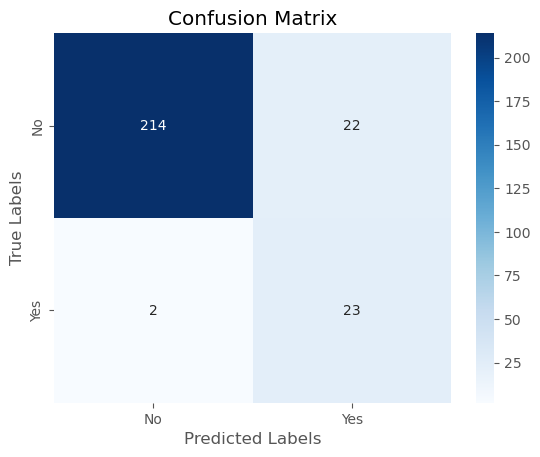

In [579]:
sns.heatmap(pd.crosstab(y_pred,y_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [580]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.91      0.99      0.95       216
         Yes       0.92      0.51      0.66        45

    accuracy                           0.91       261
   macro avg       0.91      0.75      0.80       261
weighted avg       0.91      0.91      0.90       261



Accuracy = 91%. Based on recall-Yes from report, out of all the actual 45 'Yes', 23 'Yes' was predicted correctly which is good enough

In [582]:
pd.Series(y_pred).value_counts()

No     236
Yes     25
Name: count, dtype: int64

In [583]:
pd.Series(y_test).value_counts()

Attrition
No     216
Yes     45
Name: count, dtype: int64

### Naive Bayes

In [587]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate_nb = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_nb}) #Create Data Frame
df_validate_nb['Predicted']=df_validate_nb['Predicted']
df_validate_nb.head(5)

Actual Predicted
1293     No       Yes
954      No       Yes
822      No       Yes
147      No       Yes
1159     No        No

In [588]:
# Confusion Matrix
print(pd.crosstab(y_pred_nb,y_test))

Attrition   No  Yes
row_0              
No          28    1
Yes        188   44


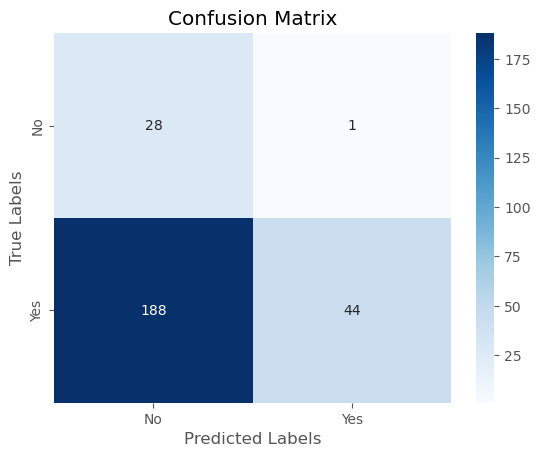

In [589]:
sns.heatmap(pd.crosstab(y_pred_nb,y_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [590]:
# Precision & Sensitivity/Recall Report
print(classification_report(y_true=y_test,y_pred=y_pred_nb))

              precision    recall  f1-score   support

          No       0.97      0.13      0.23       216
         Yes       0.19      0.98      0.32        45

    accuracy                           0.28       261
   macro avg       0.58      0.55      0.27       261
weighted avg       0.83      0.28      0.24       261



Low accuracy and precision 'Yes' on Naive Bayes Model.

In [592]:
pd.Series(y_pred_nb).value_counts()

Yes    232
No      29
Name: count, dtype: int64

In [594]:
pd.Series(y_test).value_counts()

Attrition
No     216
Yes     45
Name: count, dtype: int64

### k- Nearest Neighbors kNN

In [598]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          No       0.86      1.00      0.92       216
         Yes       0.90      0.20      0.33        45

    accuracy                           0.86       261
   macro avg       0.88      0.60      0.62       261
weighted avg       0.86      0.86      0.82       261



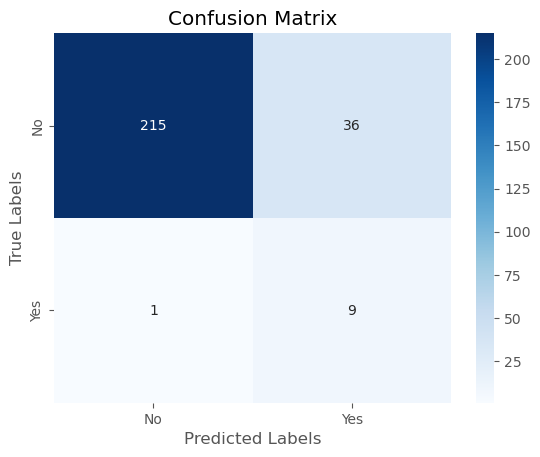

In [600]:
sns.heatmap(pd.crosstab(y_pred_knn,y_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Support-Vector Machines (SVM)

In [602]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

          No       0.86      1.00      0.92       216
         Yes       0.92      0.24      0.39        45

    accuracy                           0.87       261
   macro avg       0.89      0.62      0.66       261
weighted avg       0.87      0.87      0.83       261



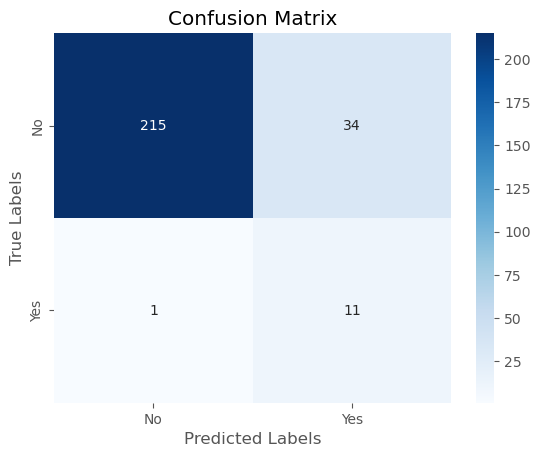

In [603]:
sns.heatmap(pd.crosstab(y_pred_svm,y_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Neural Network

In [605]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

          No       0.79      0.30      0.44       216
         Yes       0.16      0.62      0.25        45

    accuracy                           0.36       261
   macro avg       0.47      0.46      0.34       261
weighted avg       0.68      0.36      0.40       261



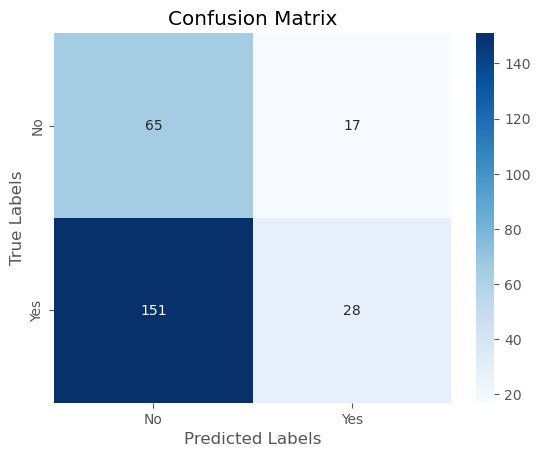

In [606]:
sns.heatmap(pd.crosstab(y_pred_nn,y_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Logistic regression model works better than Naive Bayes, kNN, SVM and Neural Network for this particular case. Need large datasets to get better performance using Neural Network model

<p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">SUMMARY AND BUSINESS INSIGHT<a id='12'></a></p>

- 📌 Highest attrition rate in Sales Representative jobrole need to be addressed
- 📌 Most employees resigned from this role were from Single employees age 18-21 years old
- 📌 Recommendations : 1. Provide more training for them to increase their values for the company
- 📌 Attrition rate can be improved from 16.12% to 14.5% ~ 10% reduction